In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
df = pd.read_csv('Train_data.csv')
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [7]:
print(df.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [9]:
print(df.describe())

           duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  25192.000000  2.519200e+04  2.519200e+04  25192.000000    25192.000000   
mean     305.054104  2.433063e+04  3.491847e+03      0.000079        0.023738   
std     2686.555640  2.410805e+06  8.883072e+04      0.008910        0.260221   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  4.400000e+01  0.000000e+00      0.000000        0.000000   
75%        0.000000  2.790000e+02  5.302500e+02      0.000000        0.000000   
max    42862.000000  3.817091e+08  5.151385e+06      1.000000        3.000000   

            urgent           hot  num_failed_logins     logged_in  \
count  25192.00000  25192.000000       25192.000000  25192.000000   
mean       0.00004      0.198039           0.001191      0.394768   
std        0.00630      2.154202           0.045418      0.4888

### EDA

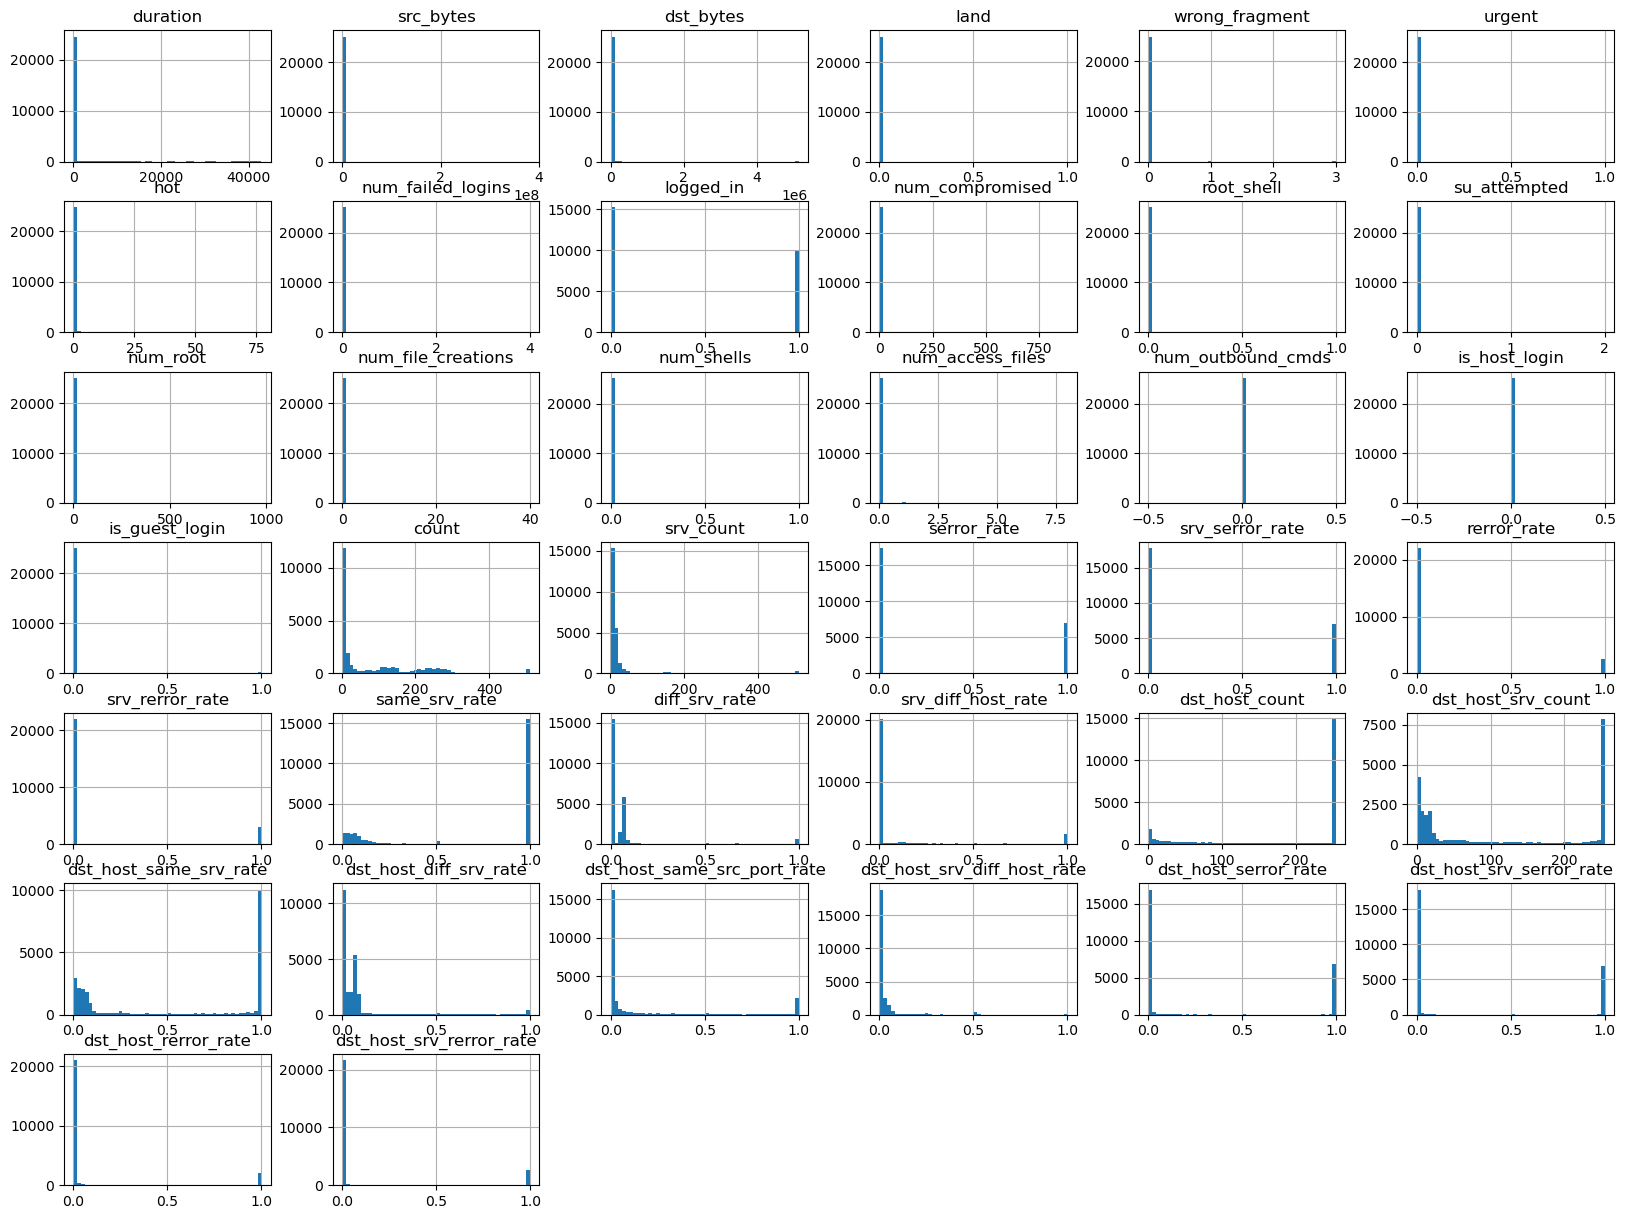

In [10]:
df.hist(bins=50, figsize=(20, 15))
plt.show()


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

In [13]:
correlation_matrix = numerical_df.corr()


C:\Users\Jain Computers\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


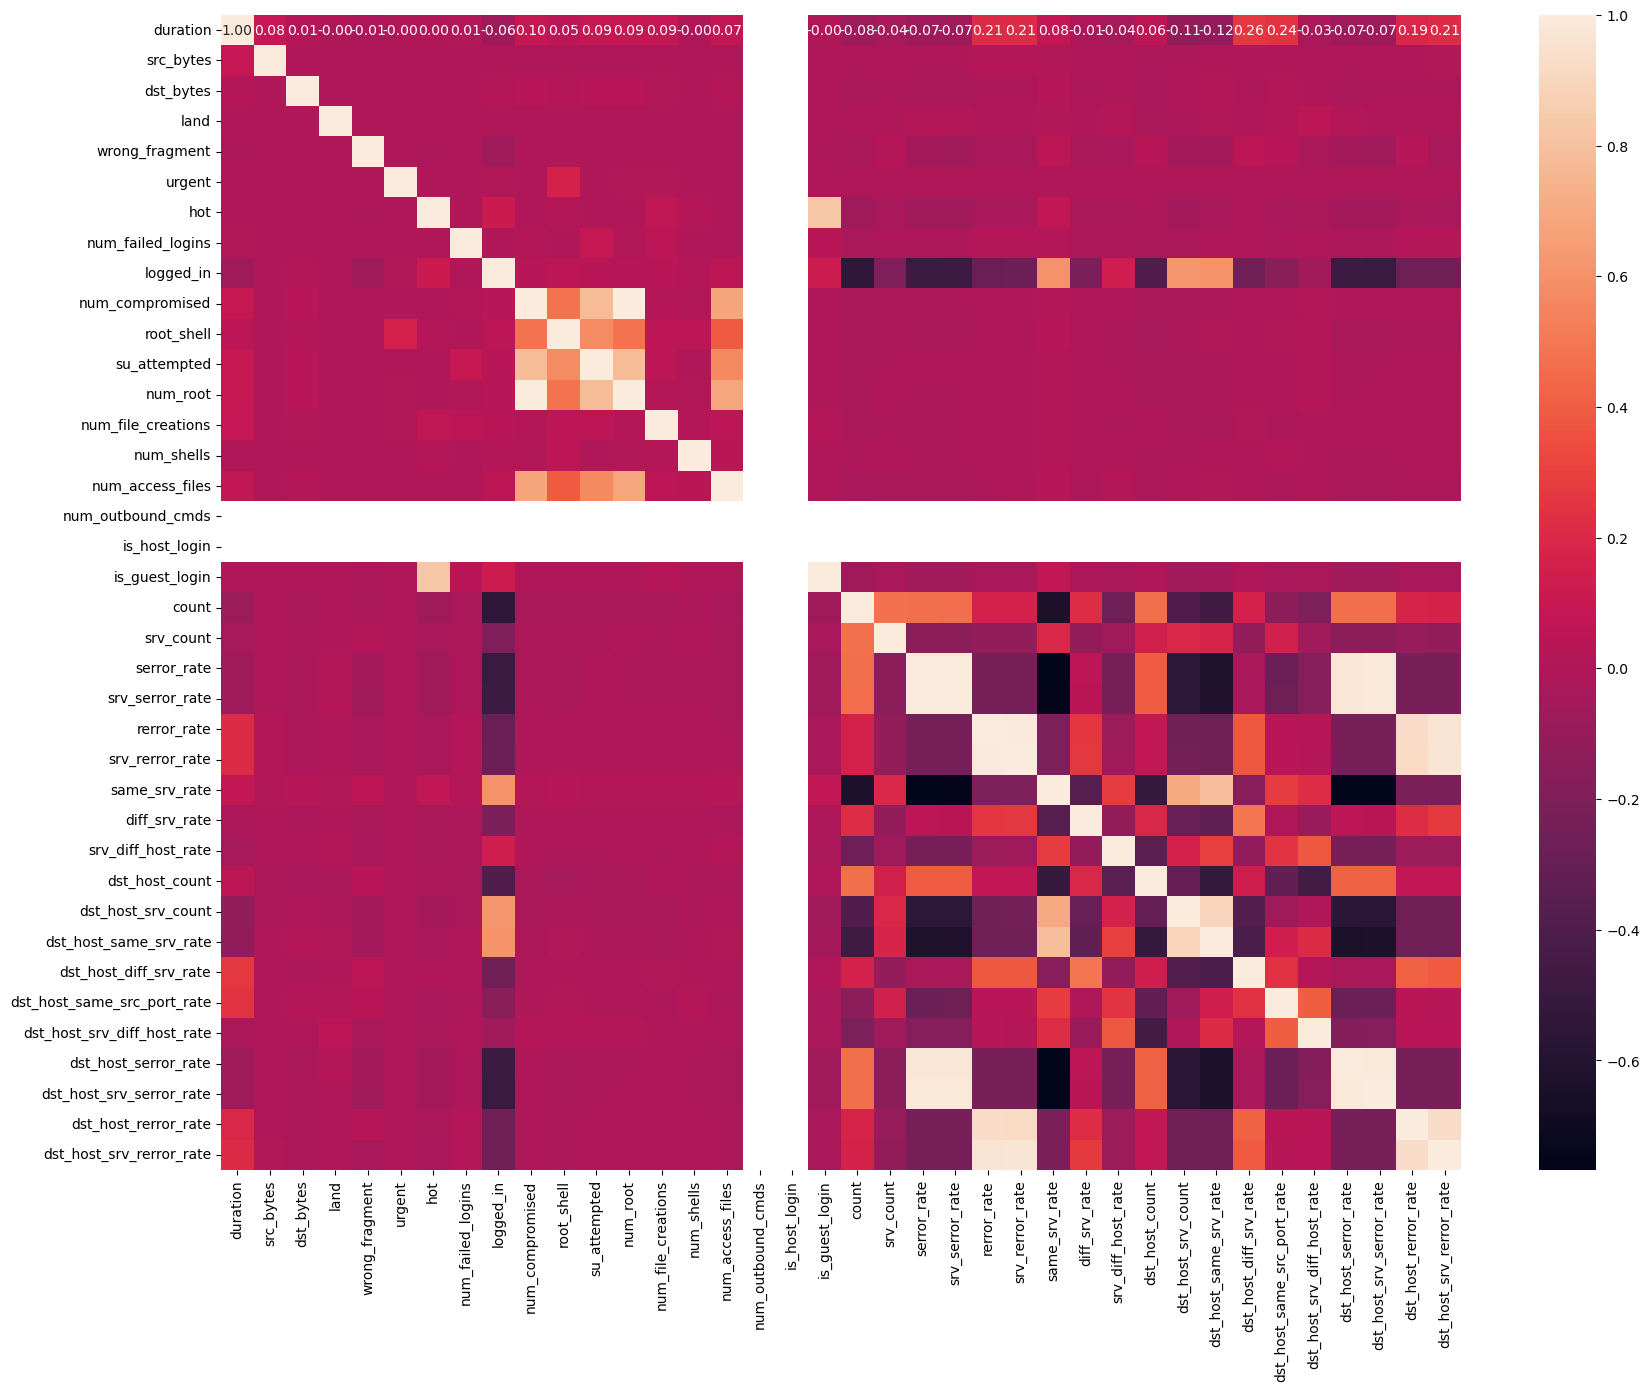

In [14]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

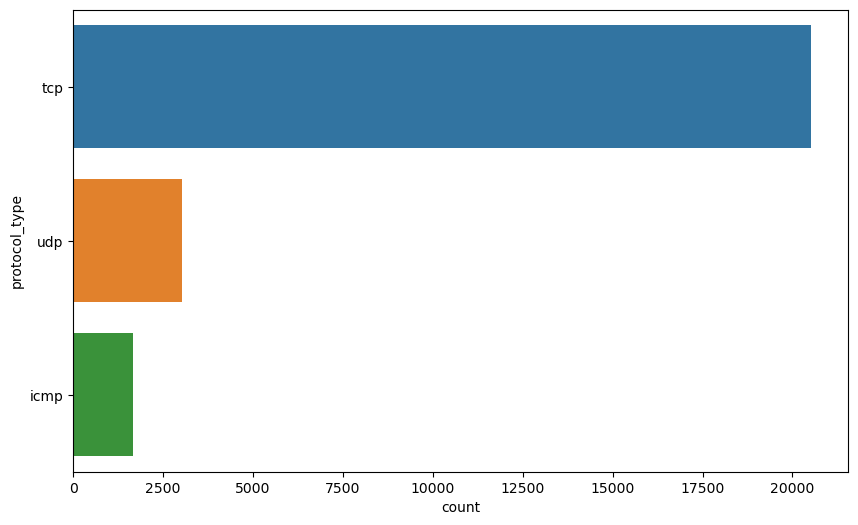

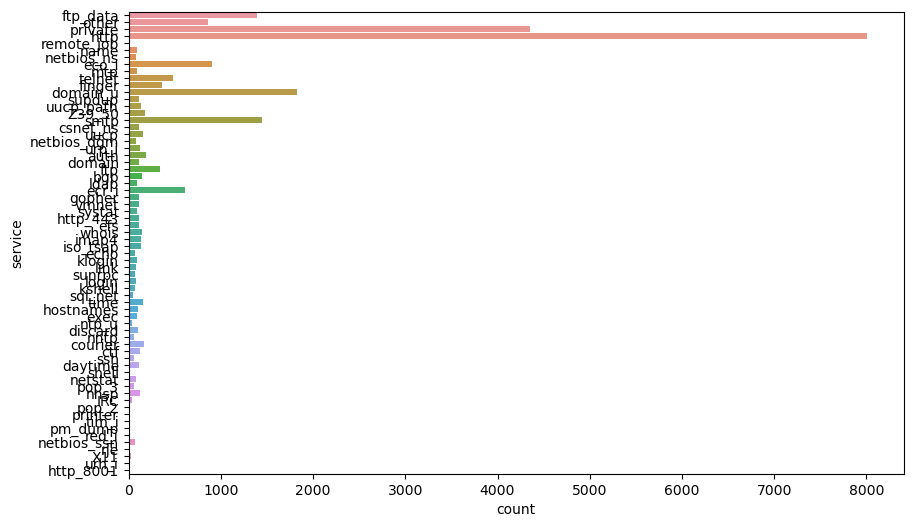

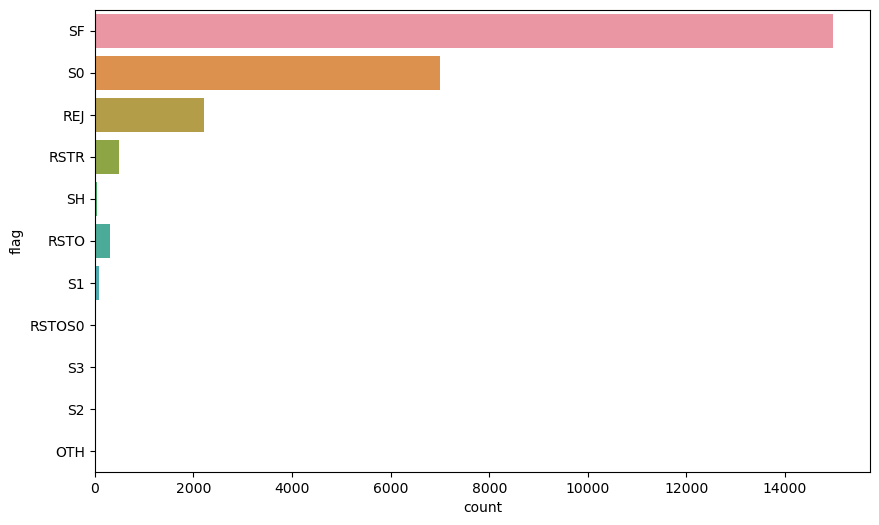

In [15]:
categorical_features = ['protocol_type', 'service', 'flag']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=feature, data=df)
    plt.show()

### handling outliers

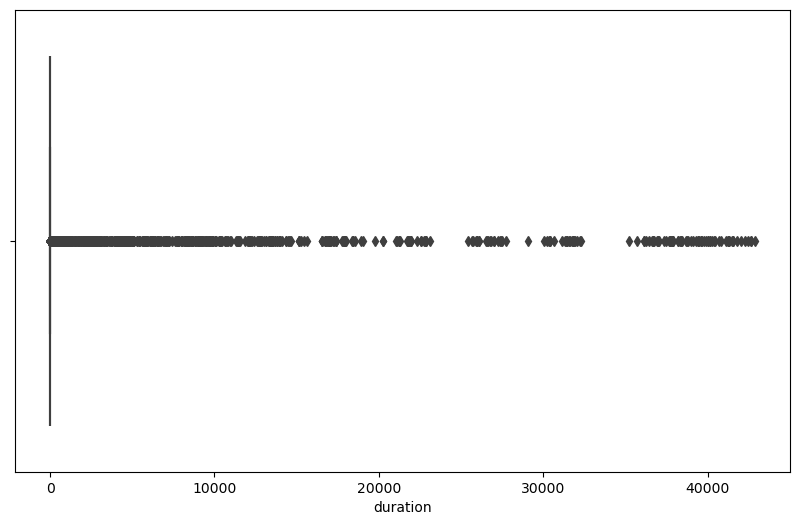

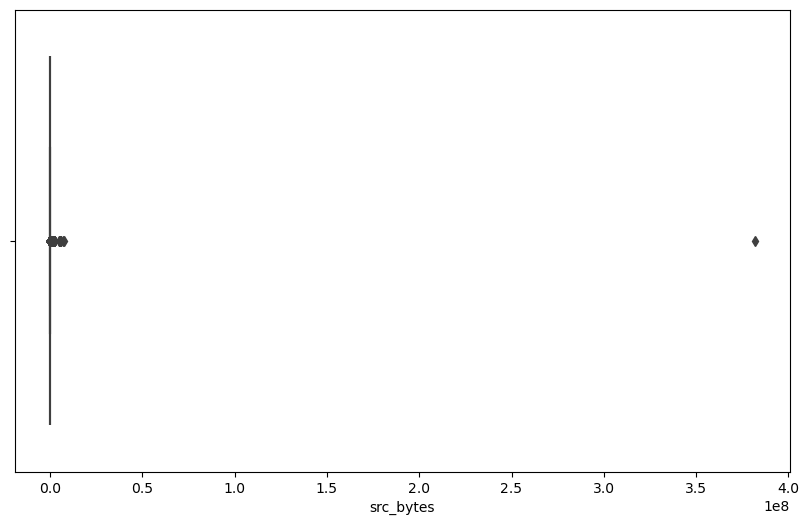

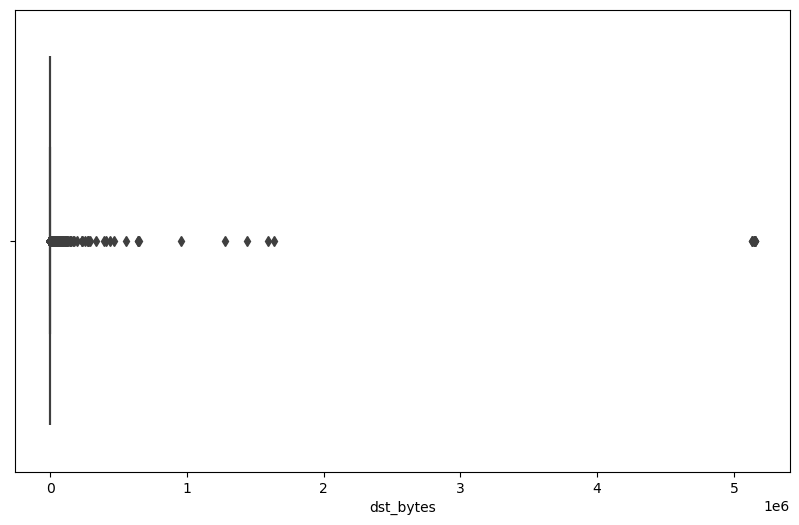

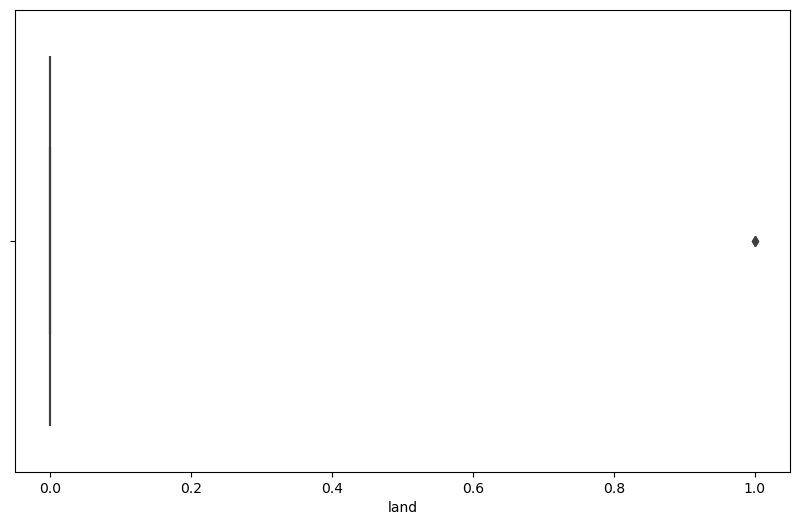

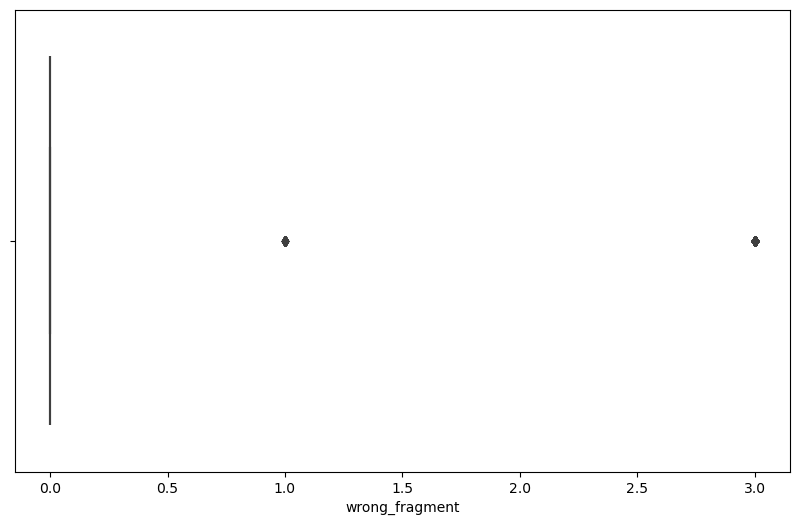

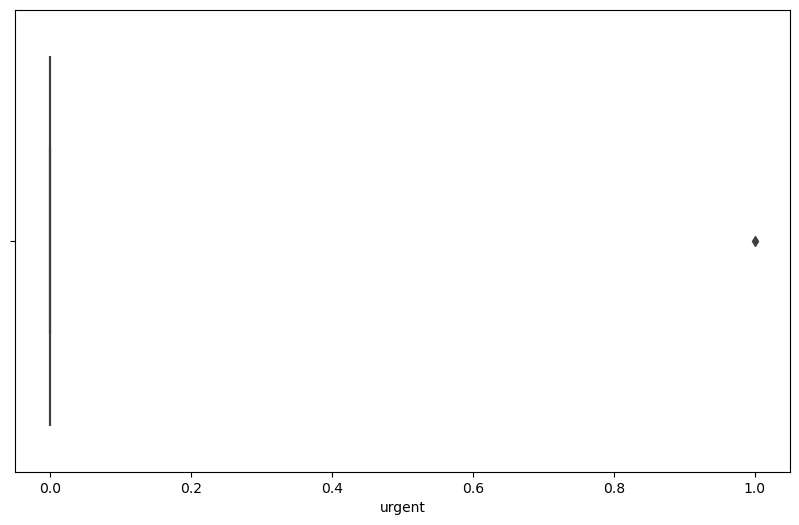

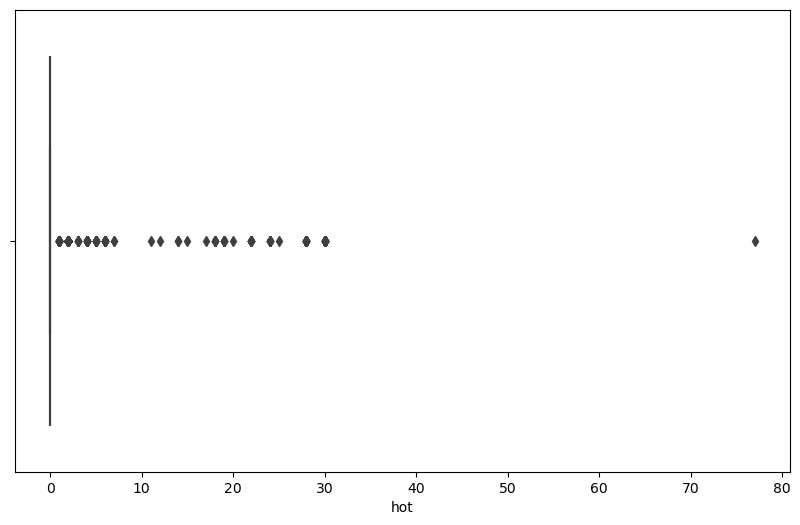

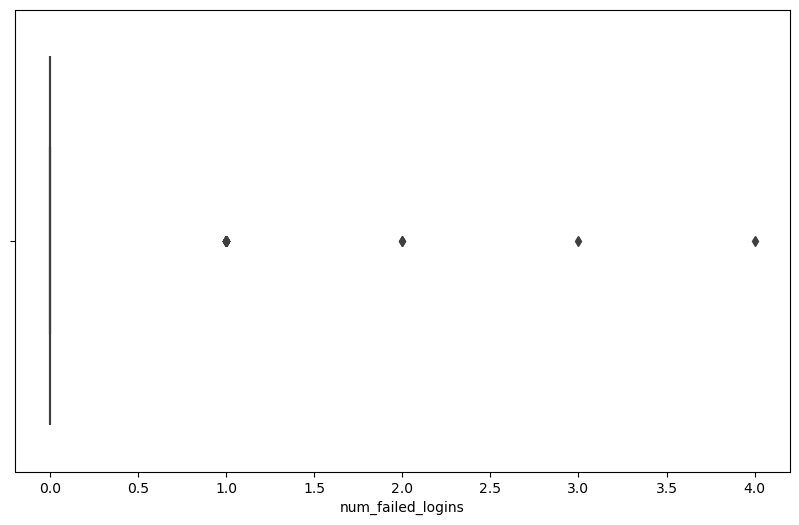

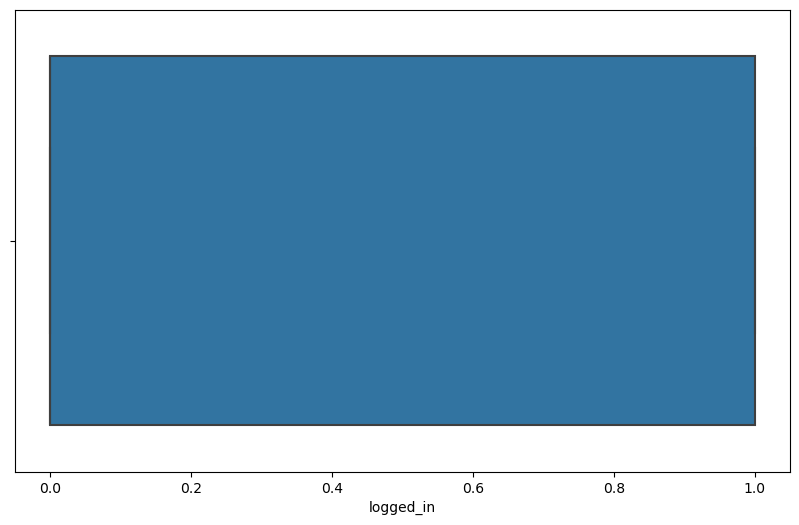

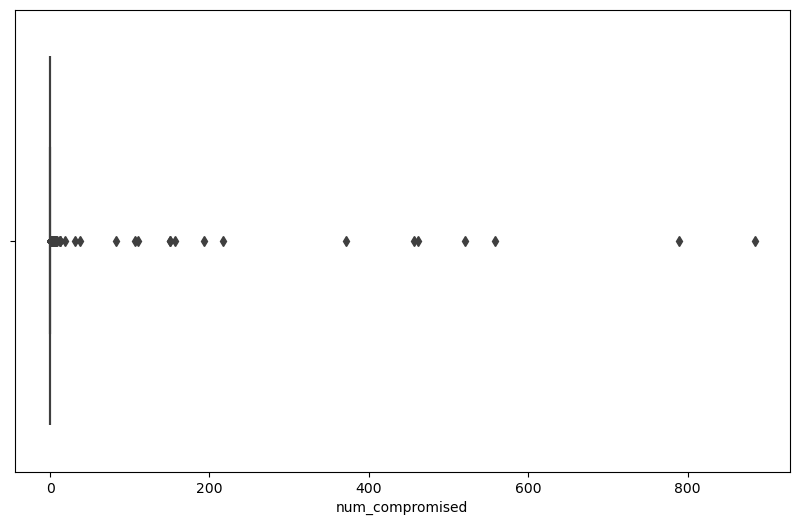

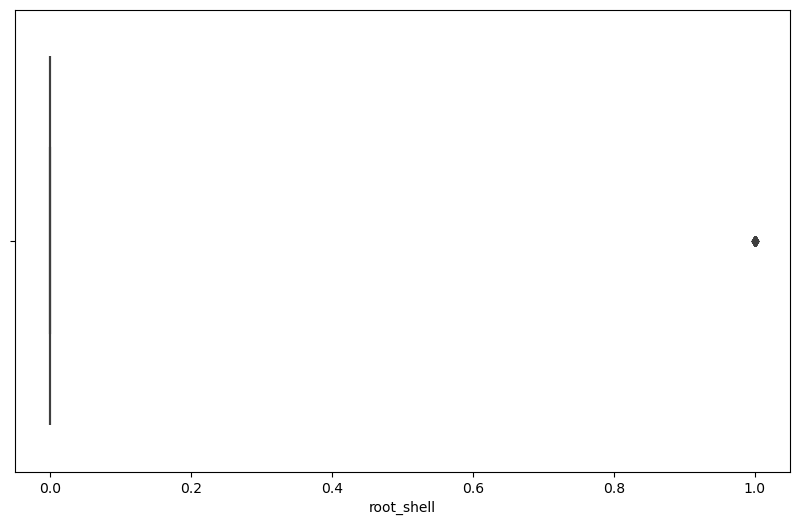

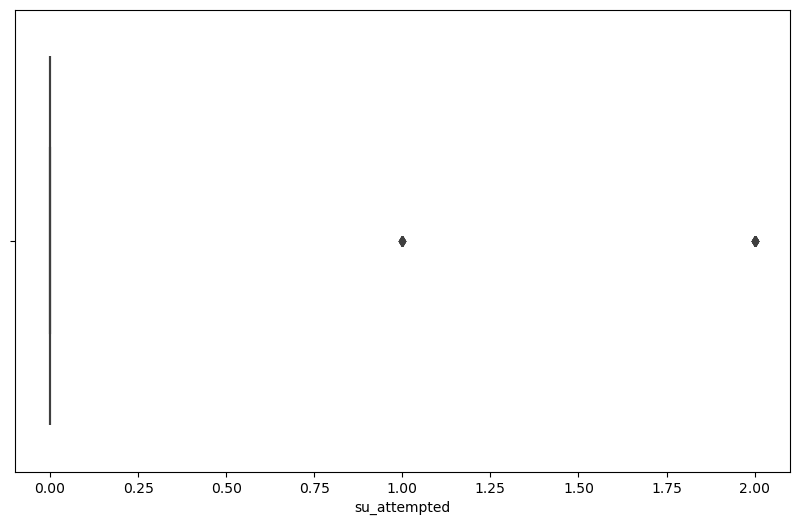

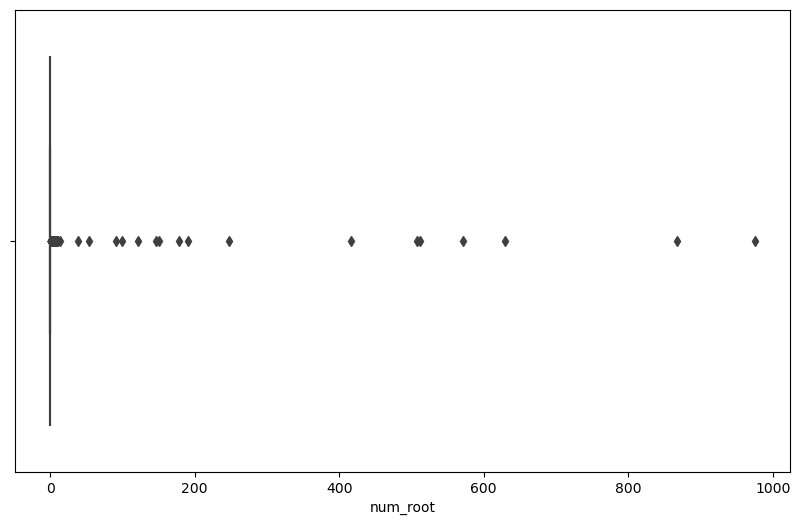

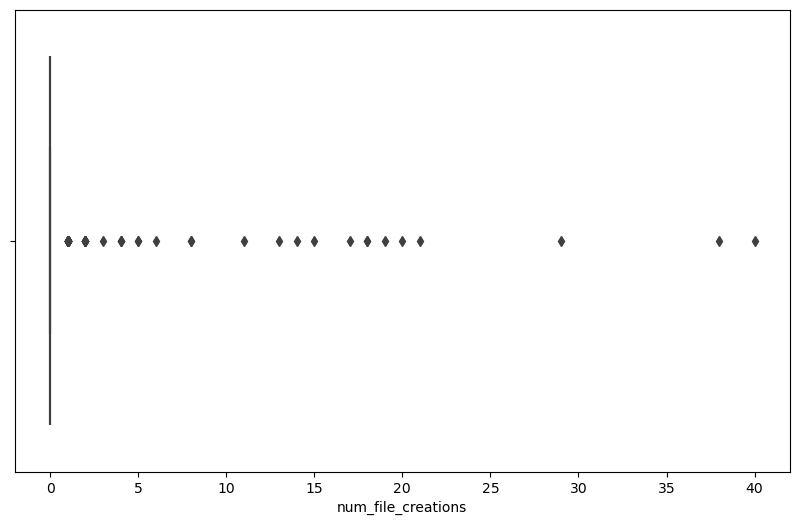

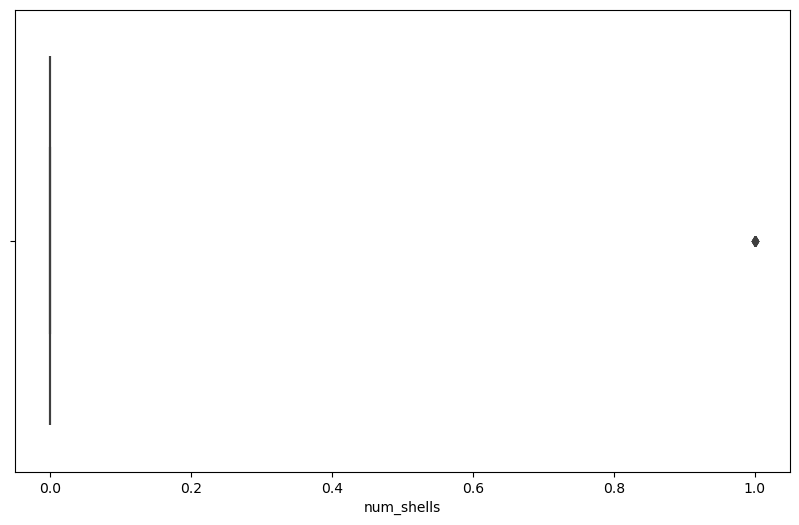

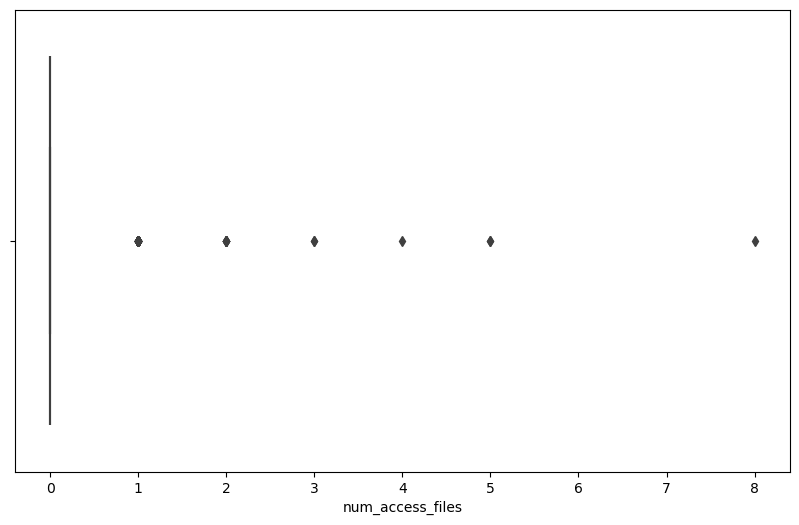

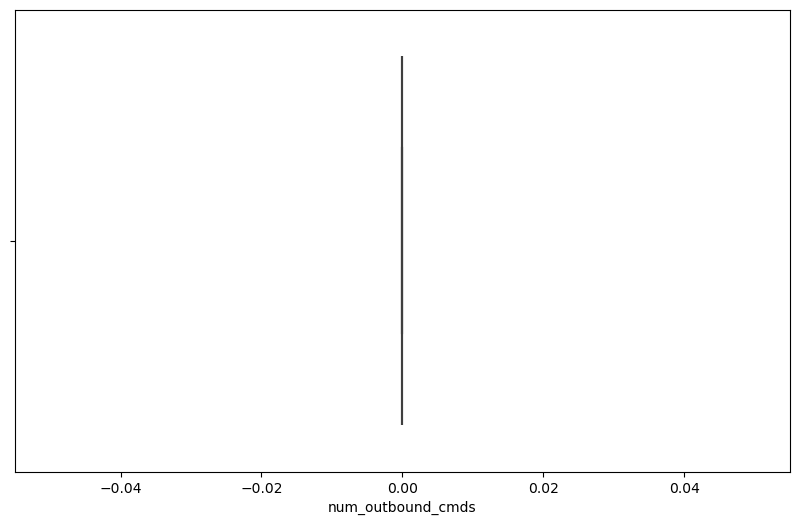

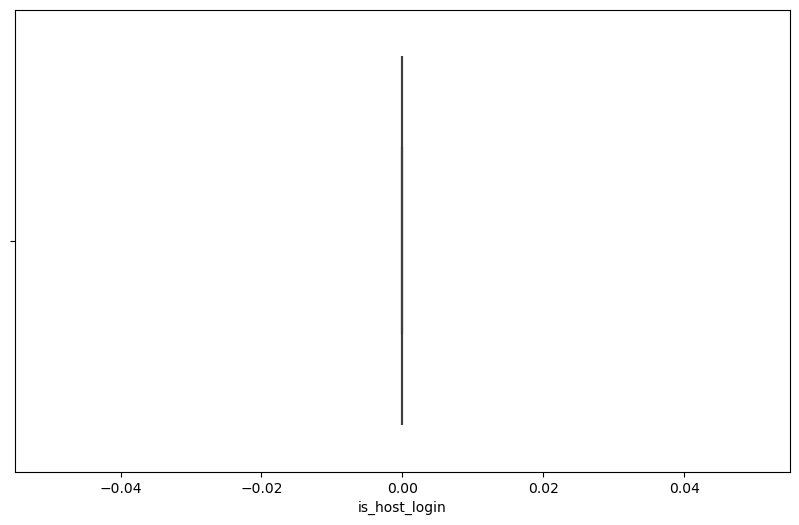

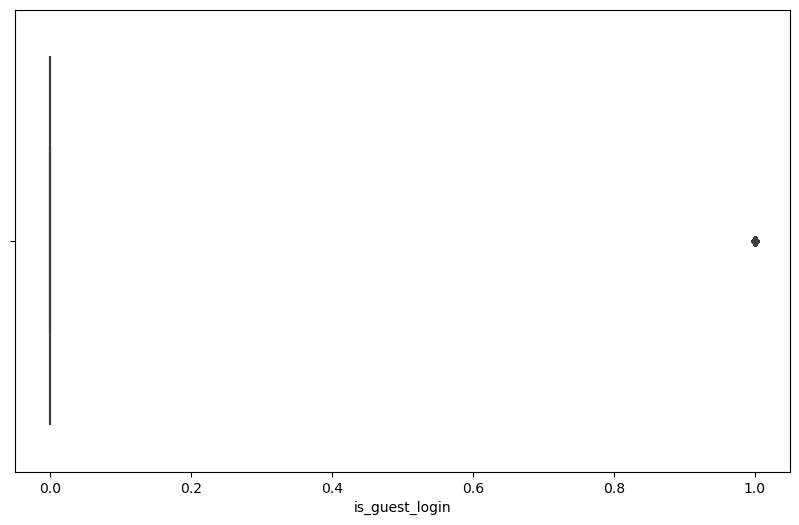

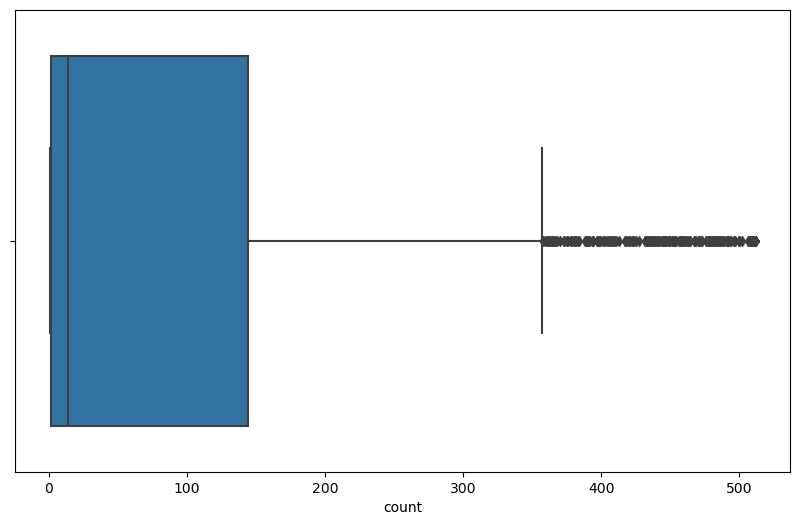

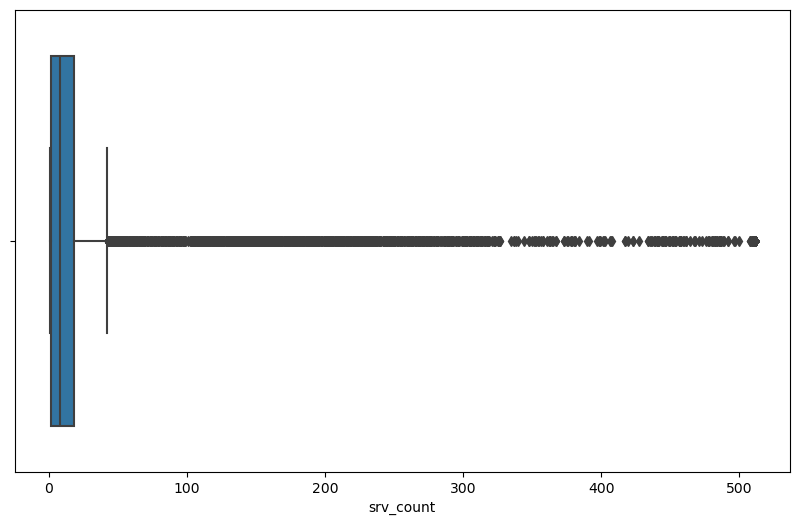

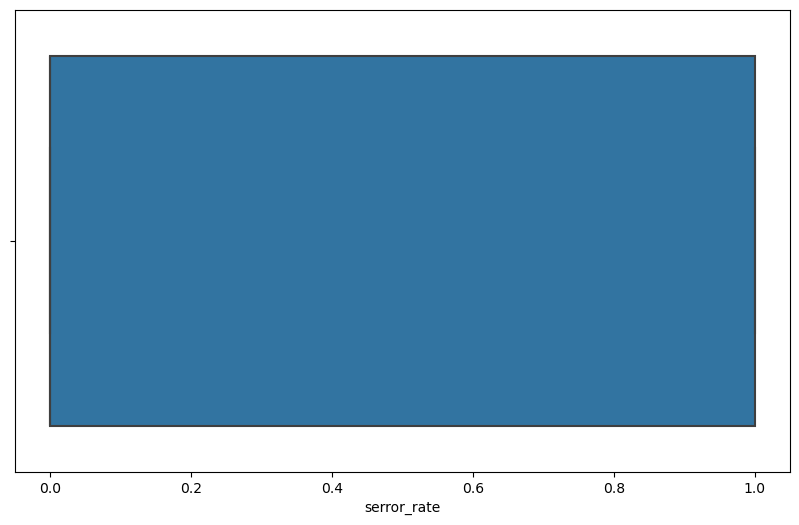

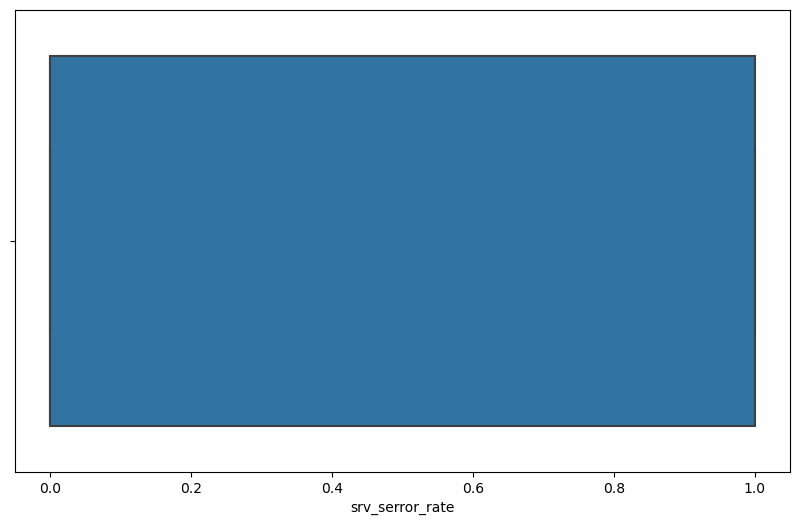

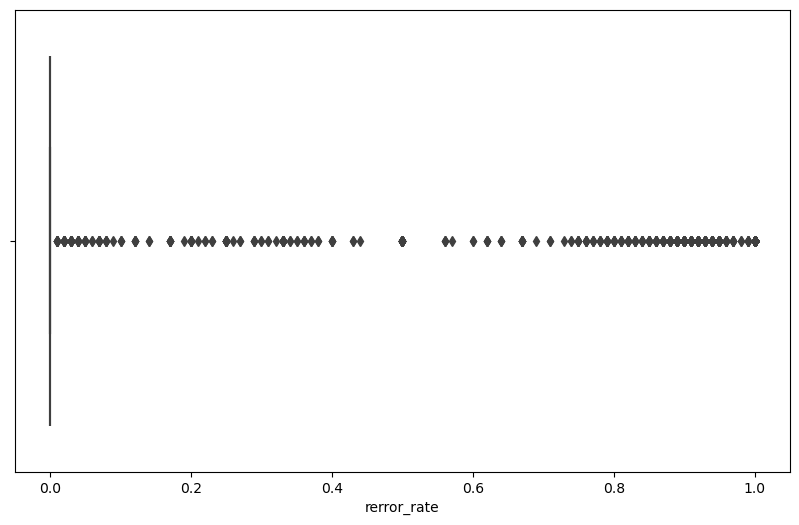

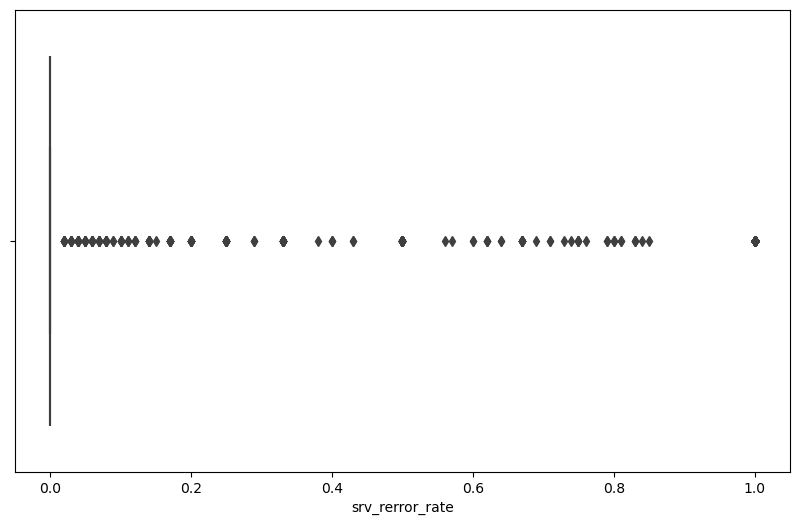

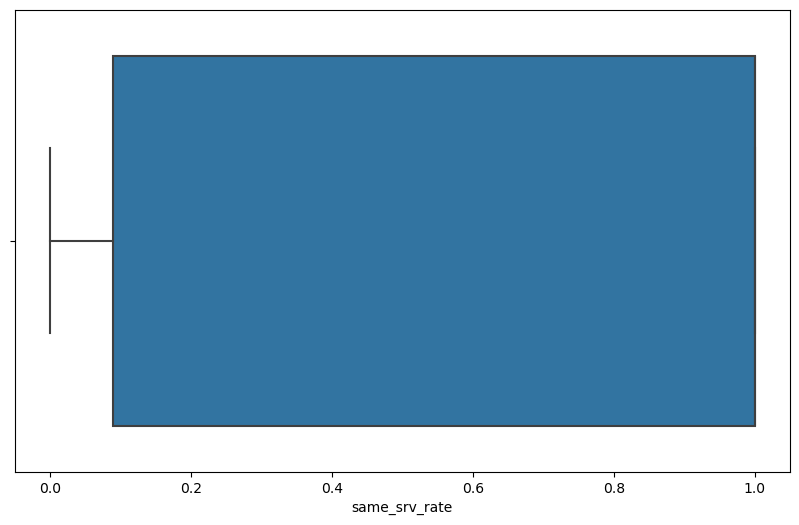

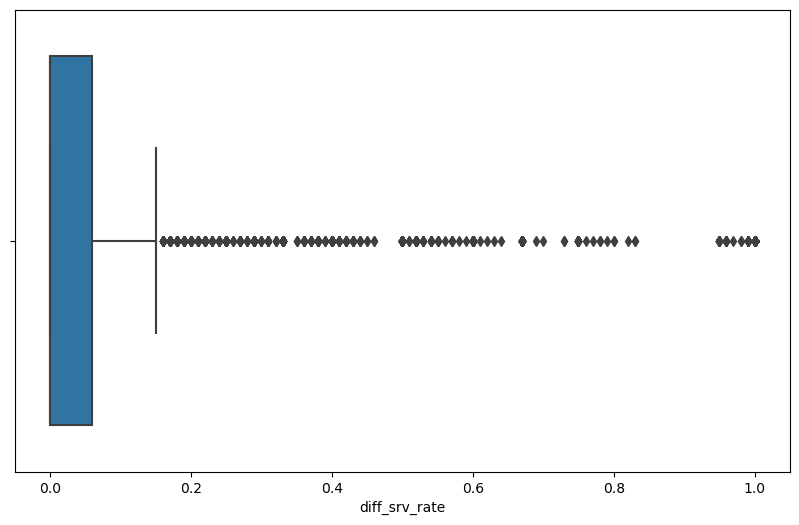

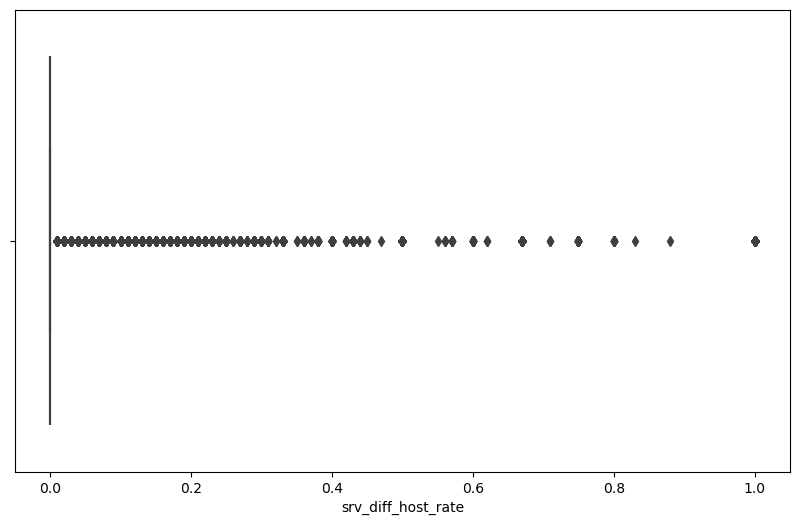

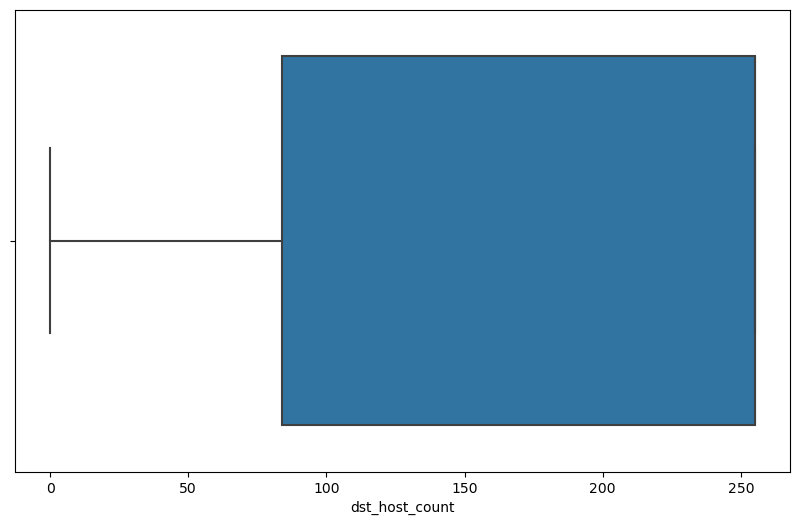

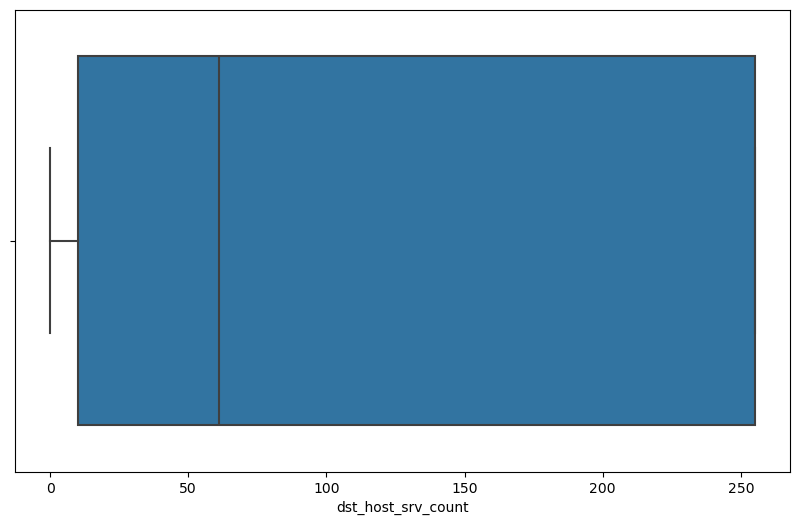

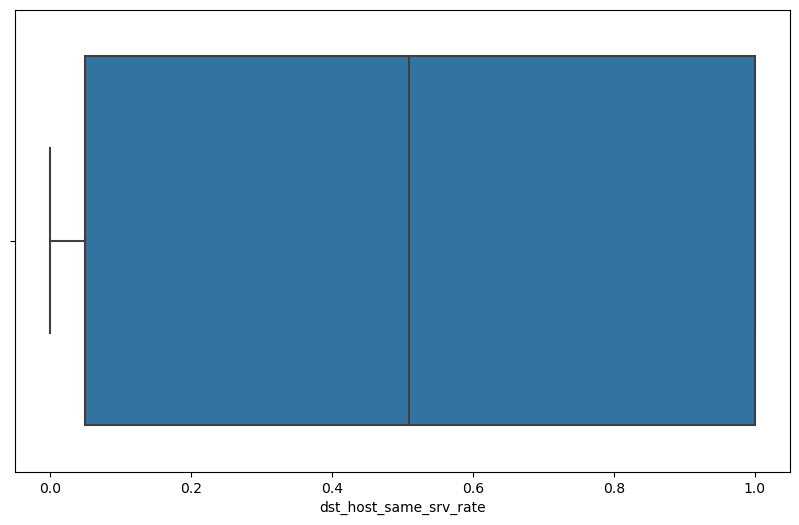

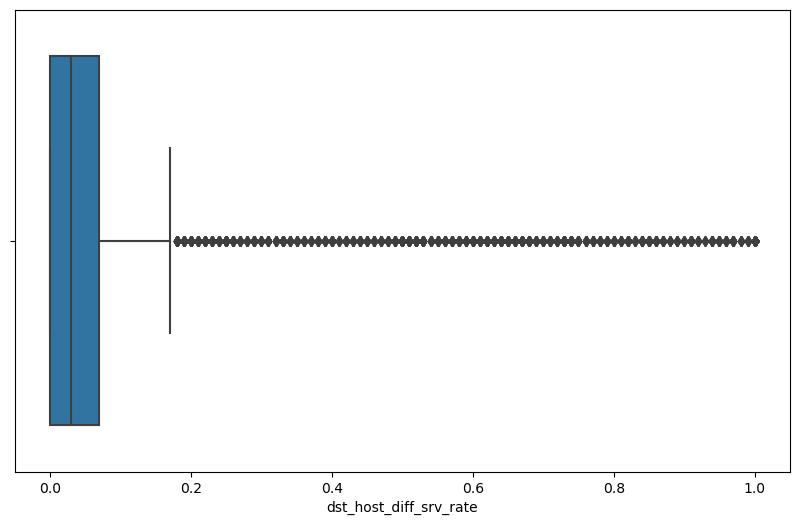

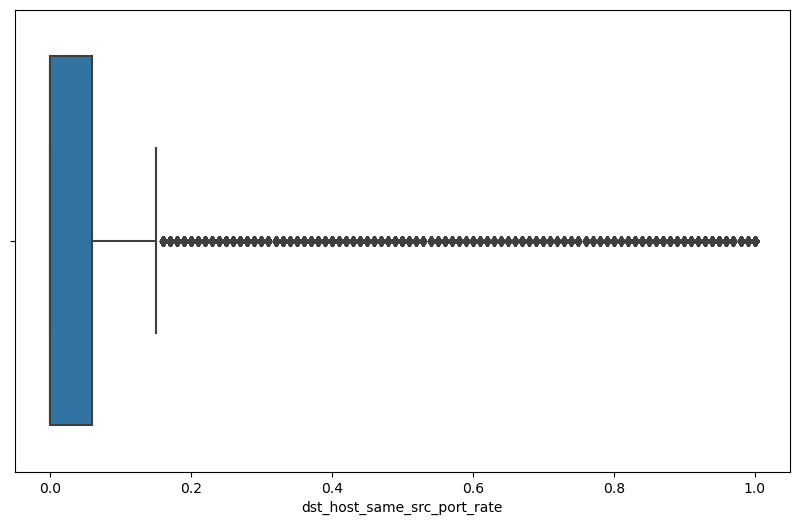

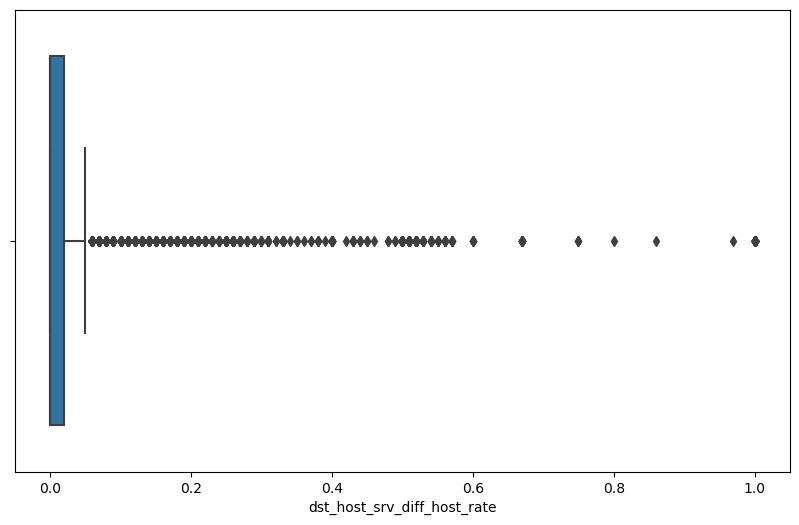

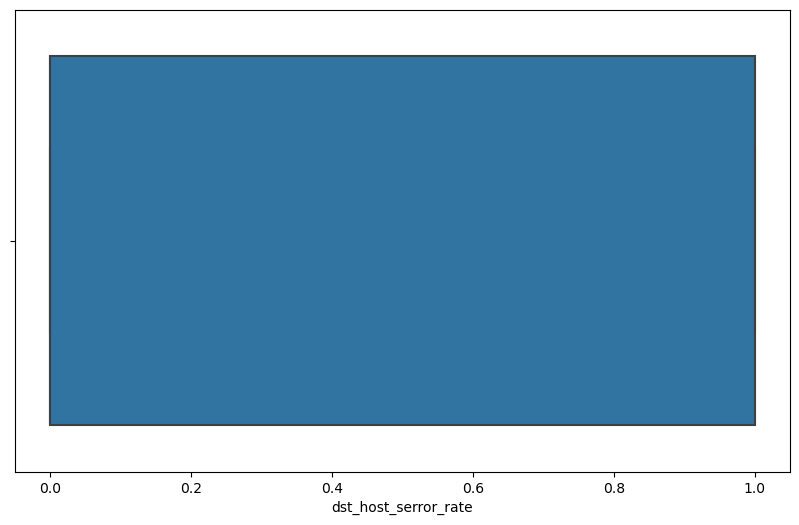

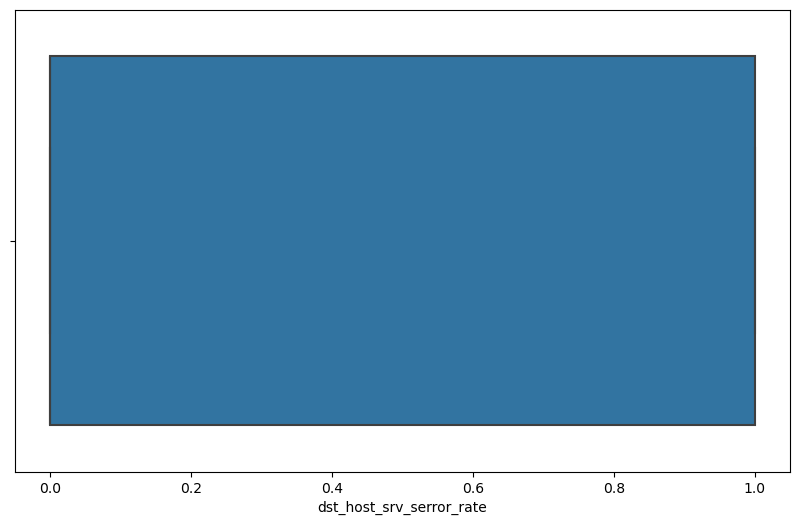

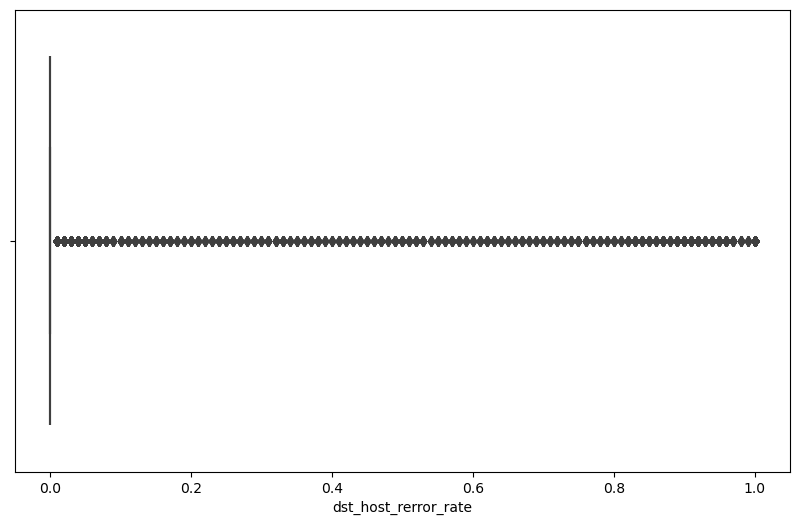

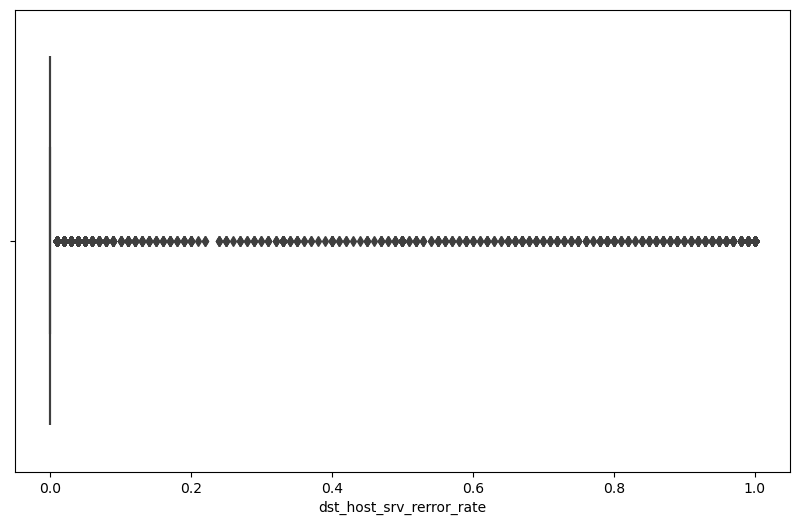

In [16]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, data=df)
    plt.show()

In [17]:
from scipy import stats

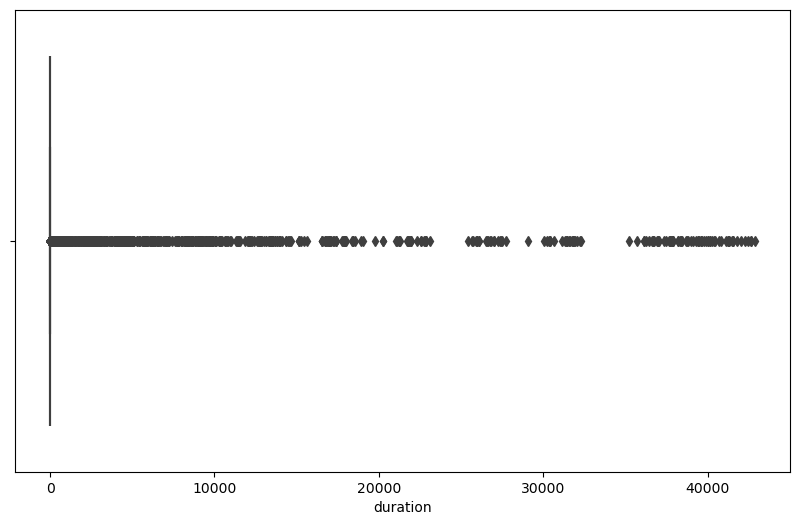

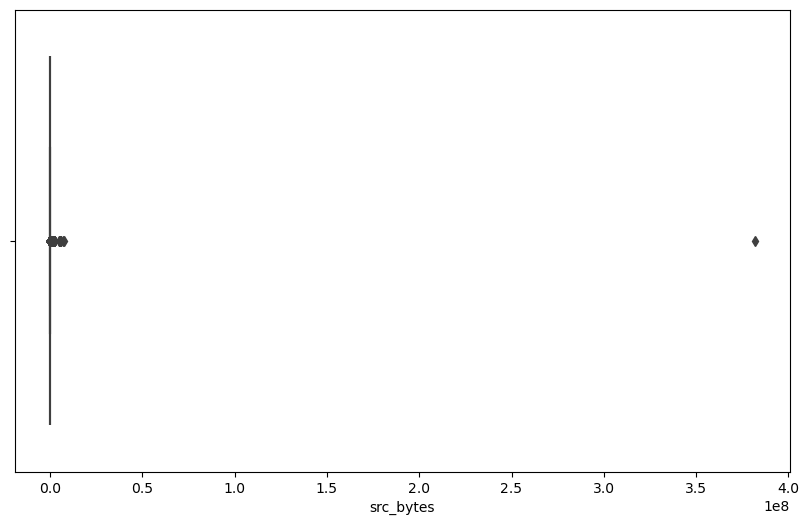

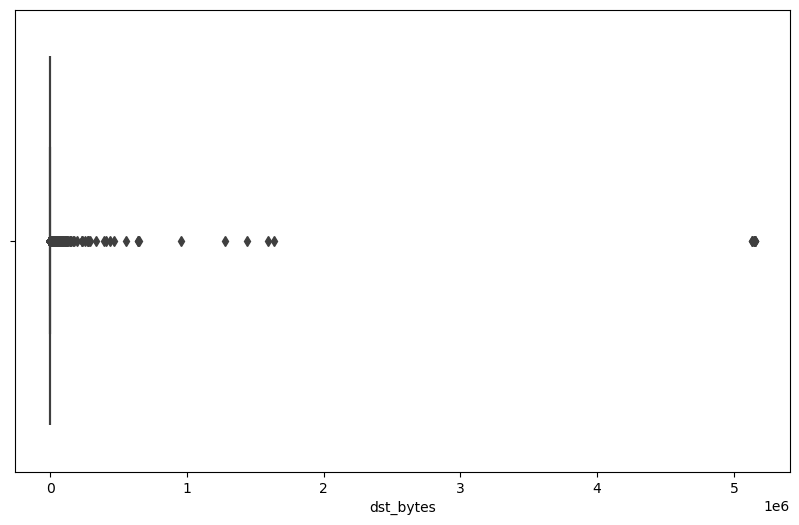

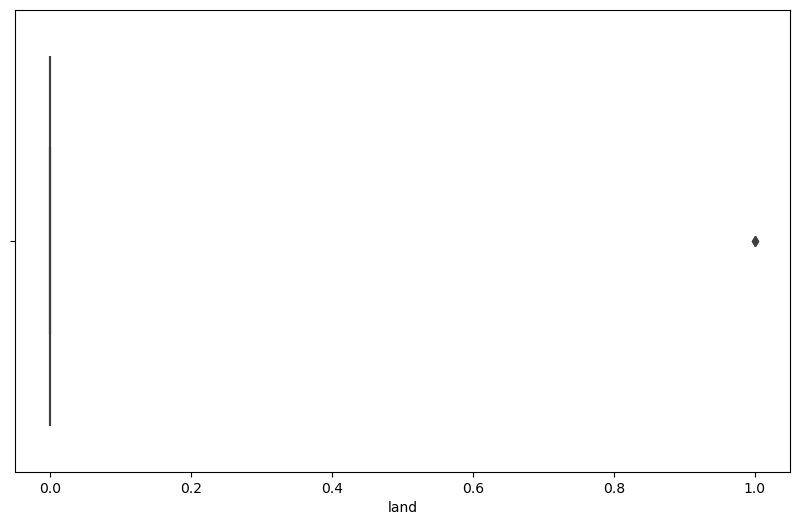

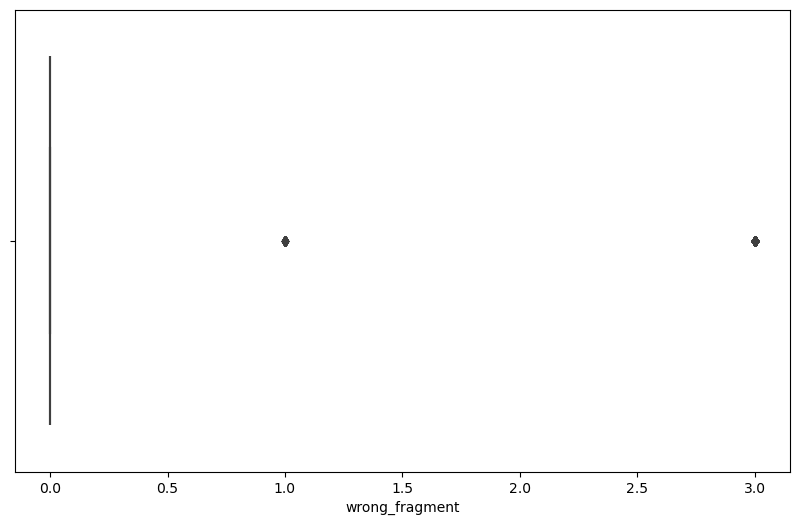

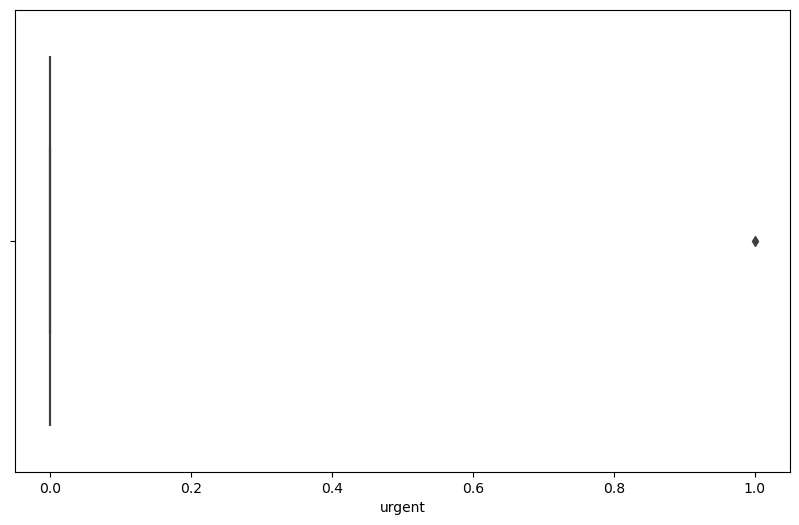

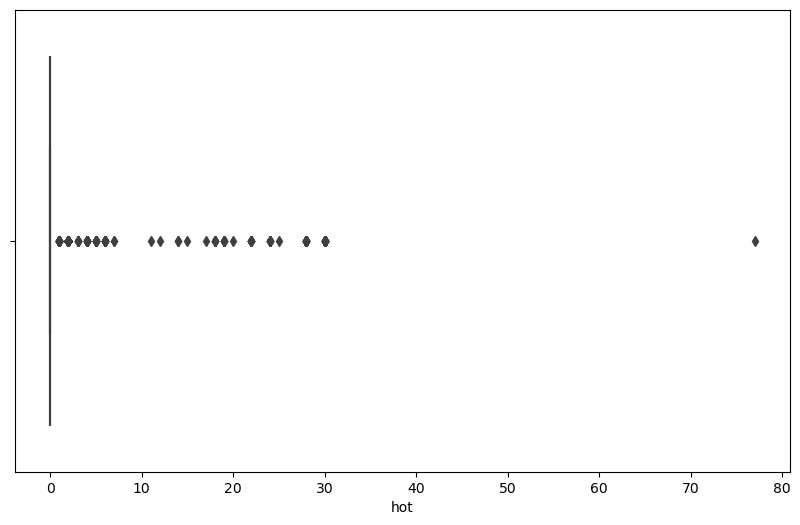

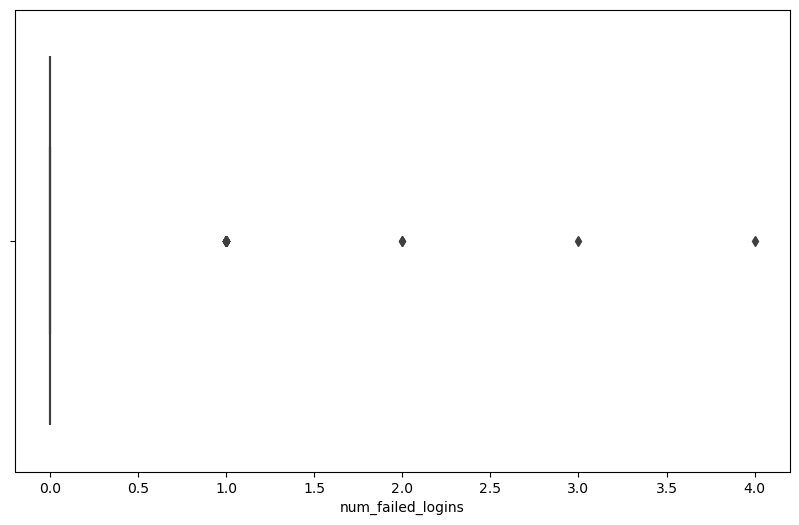

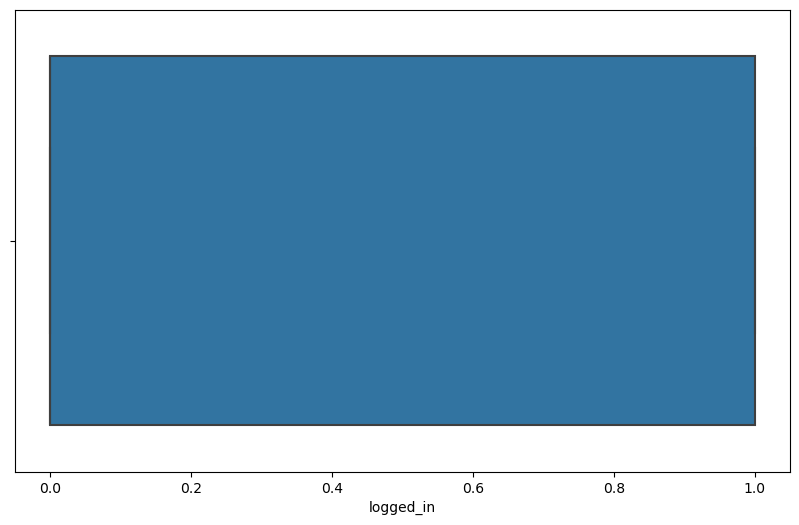

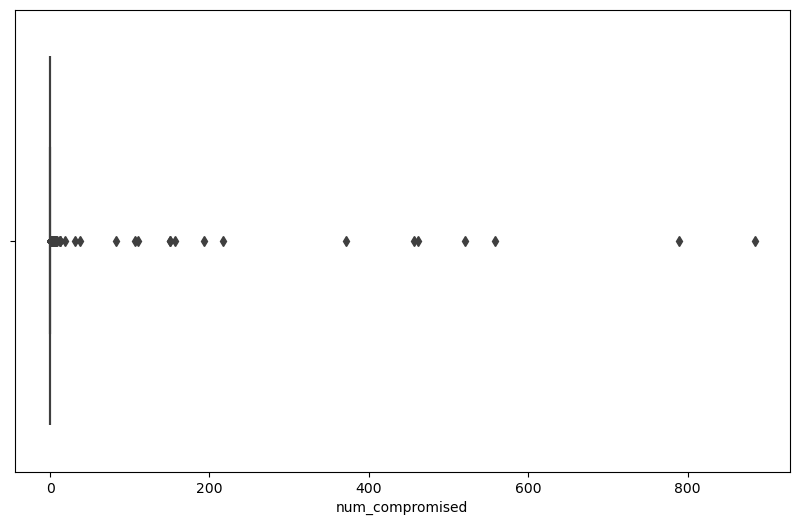

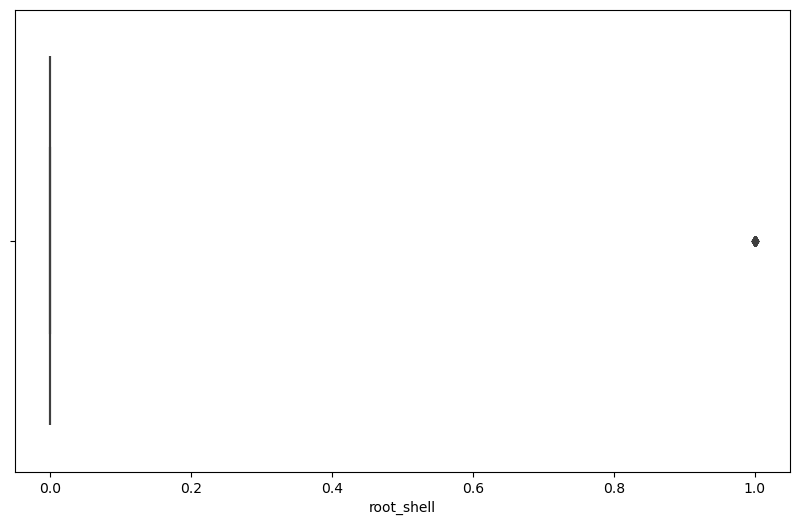

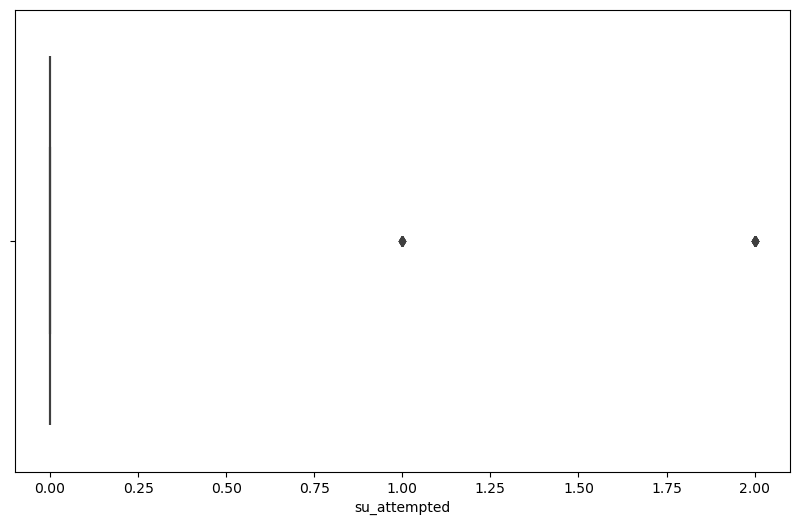

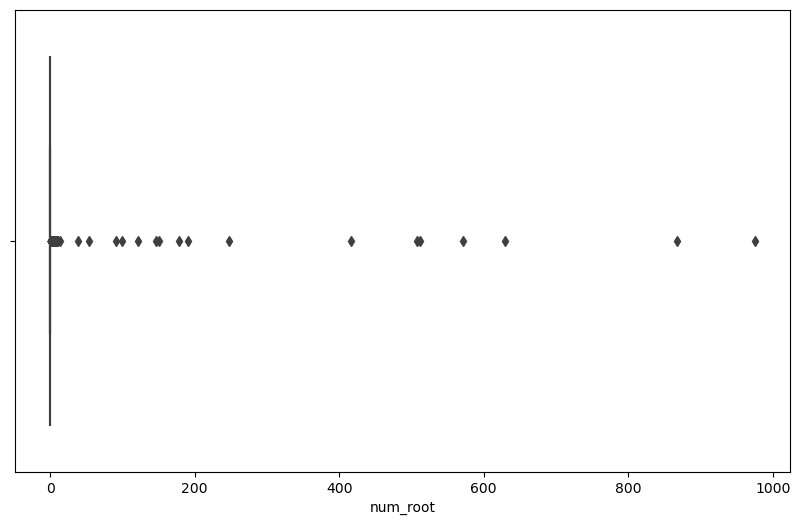

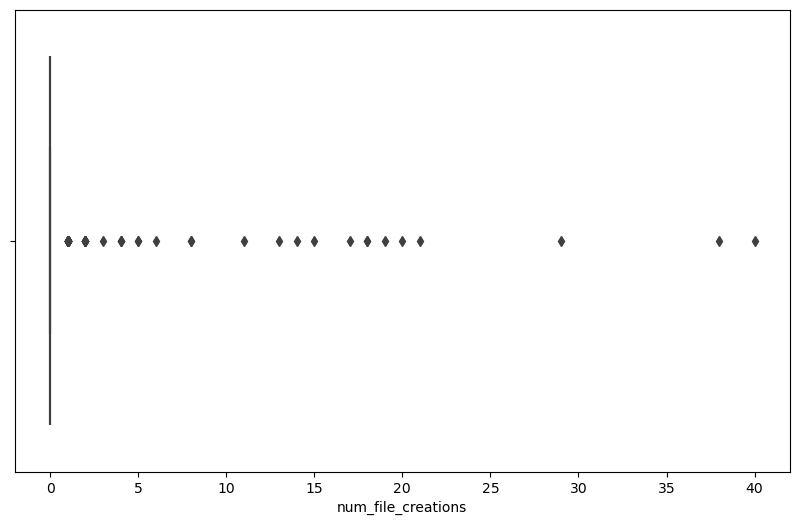

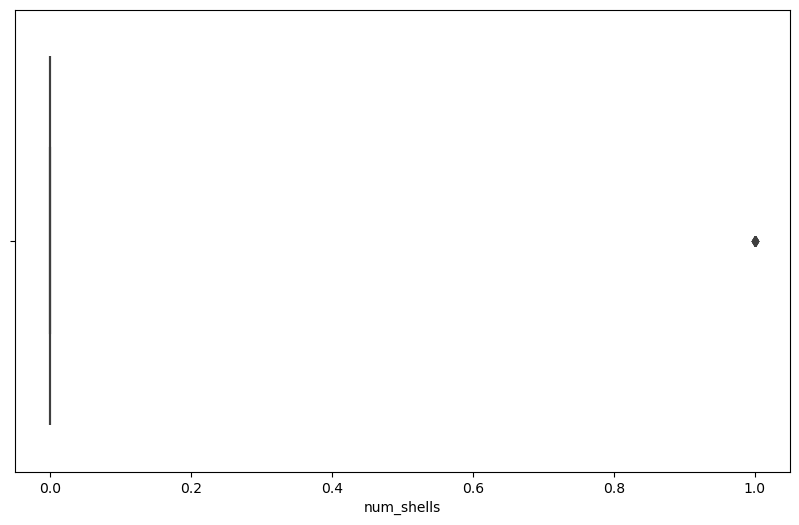

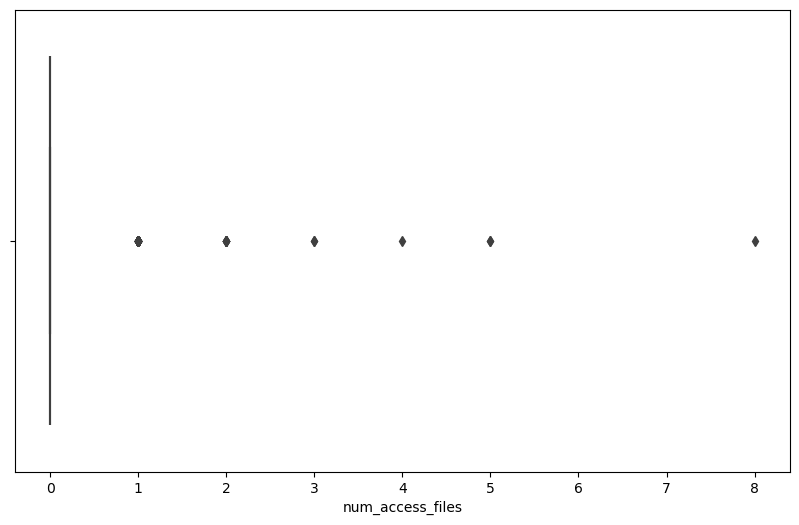

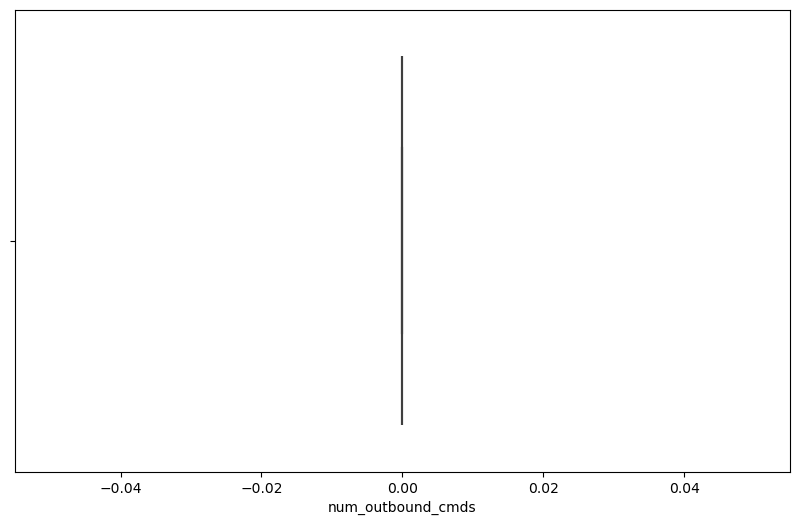

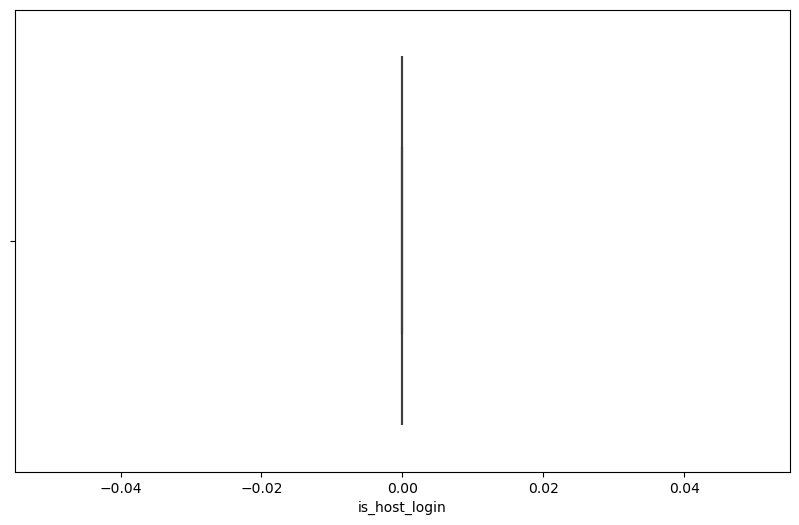

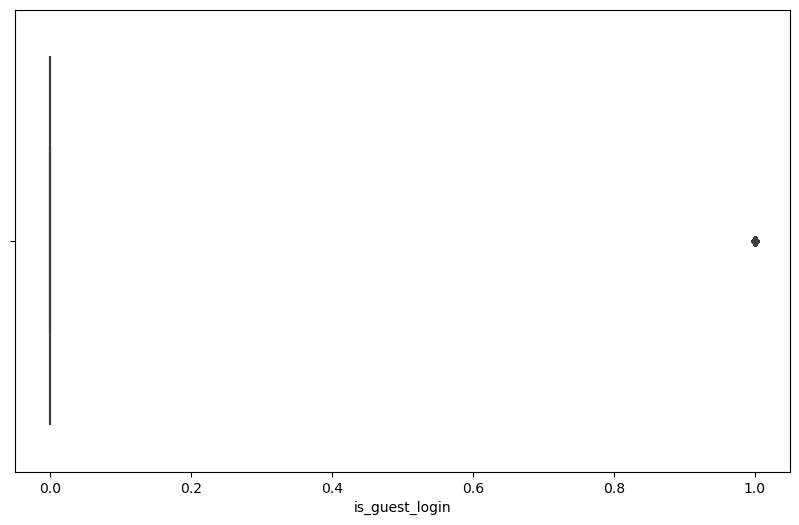

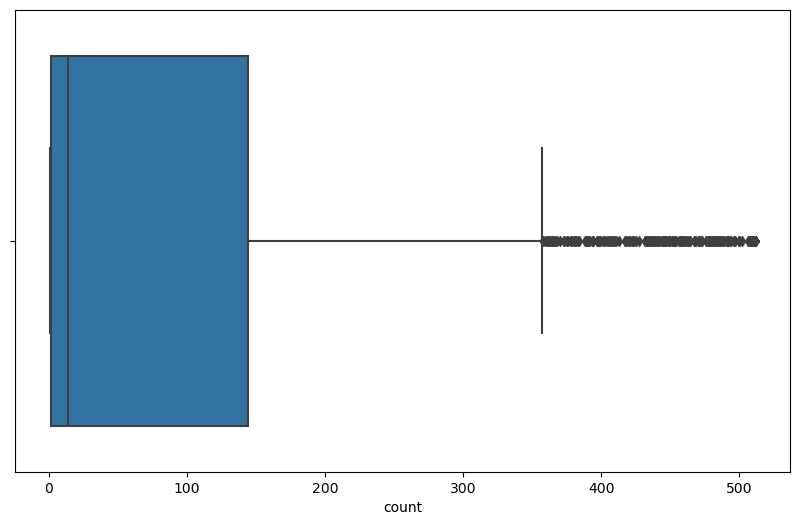

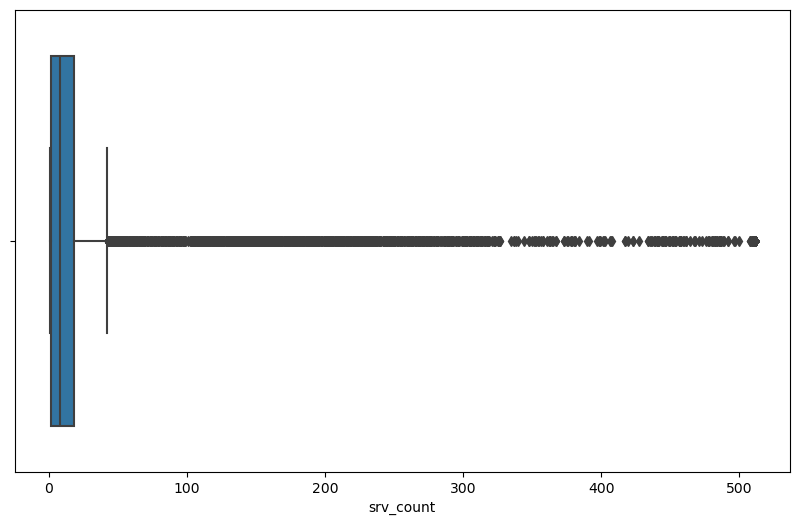

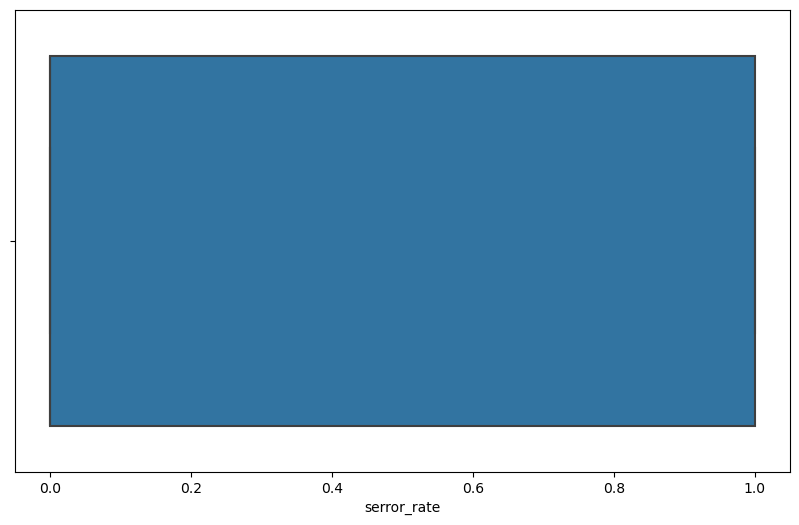

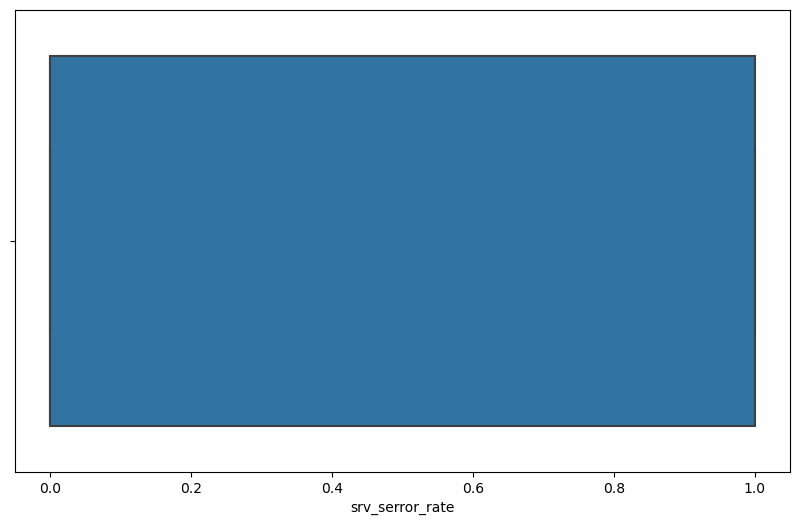

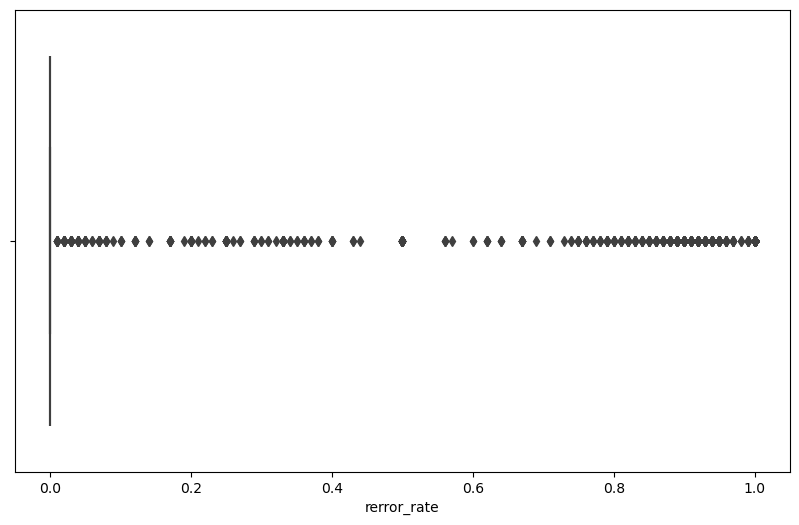

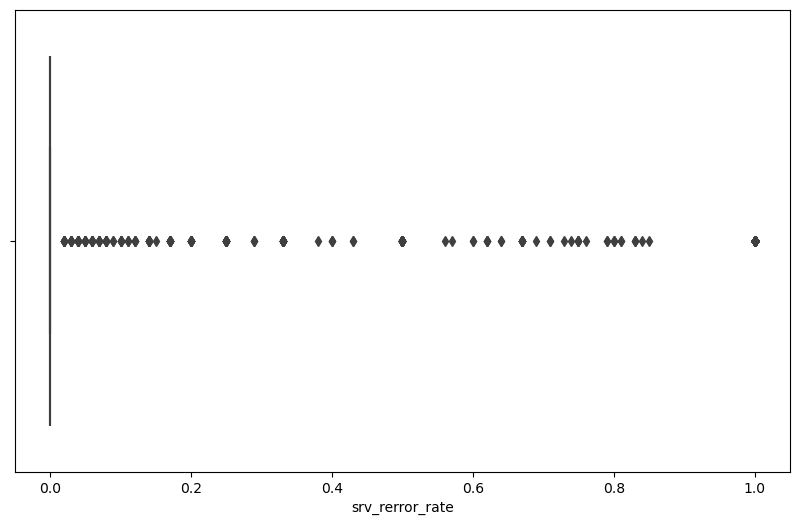

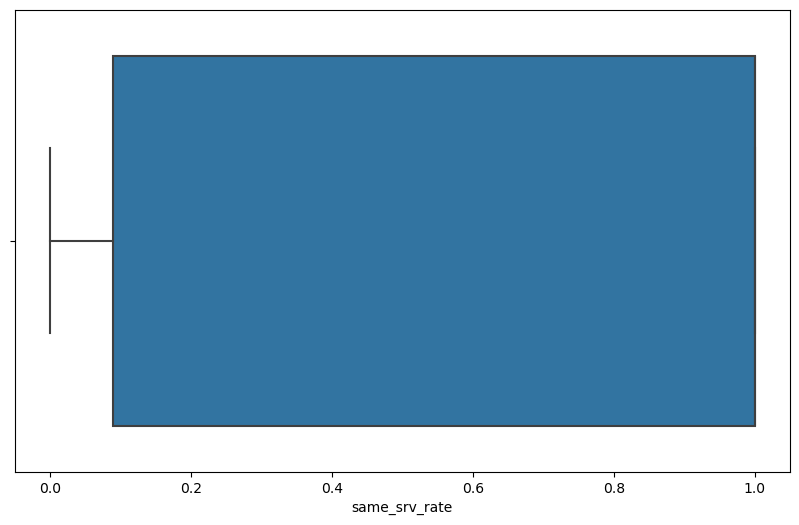

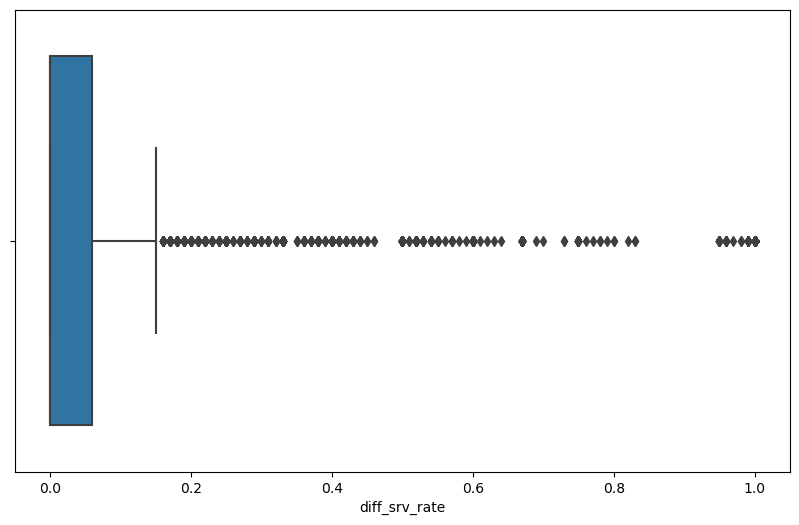

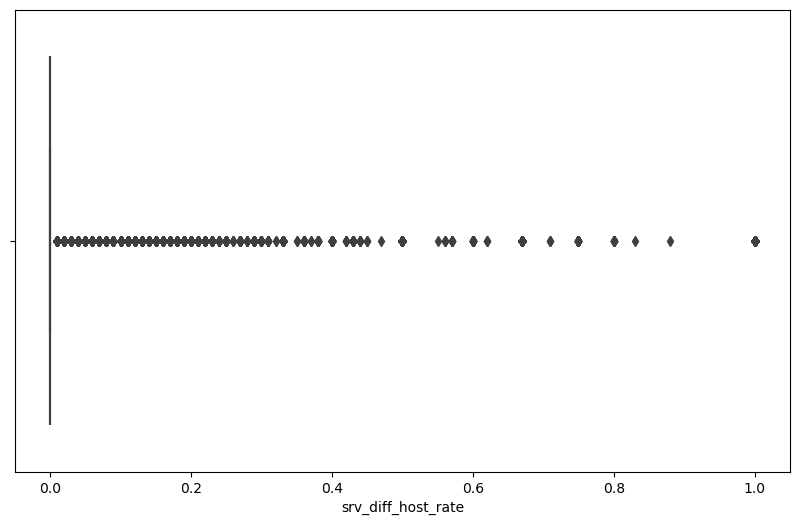

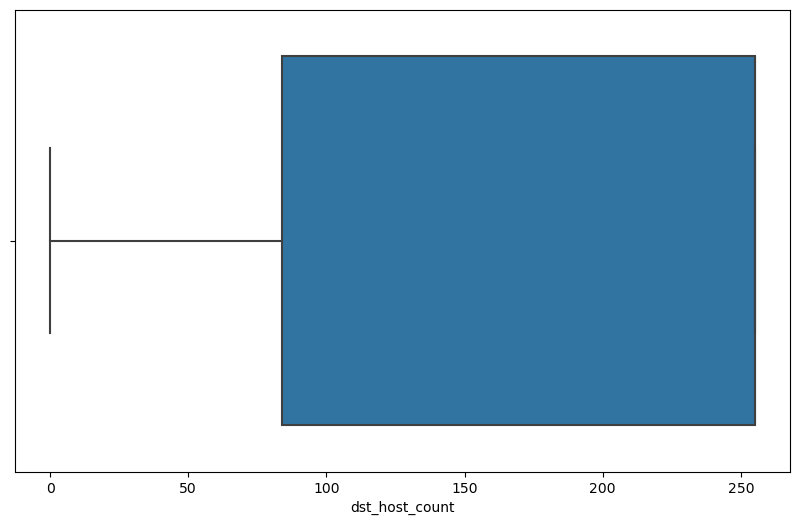

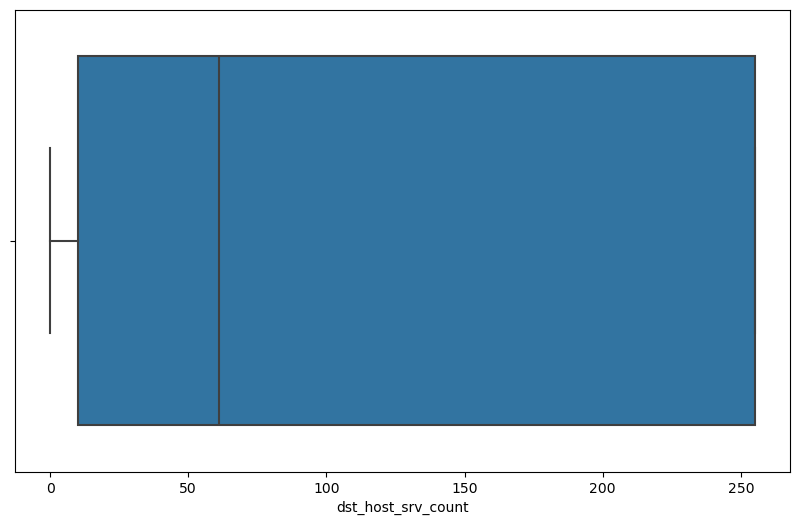

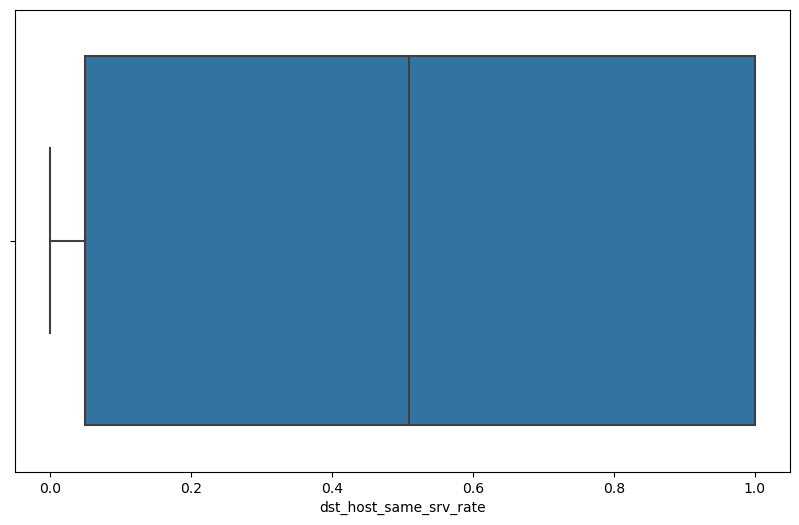

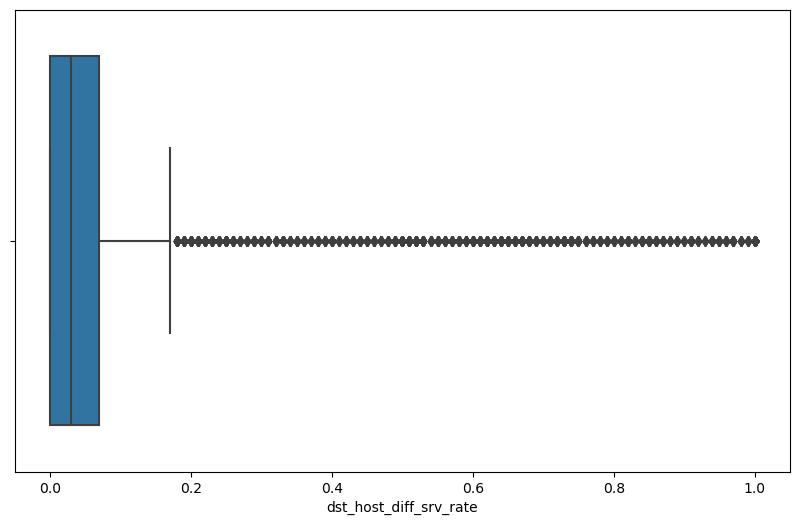

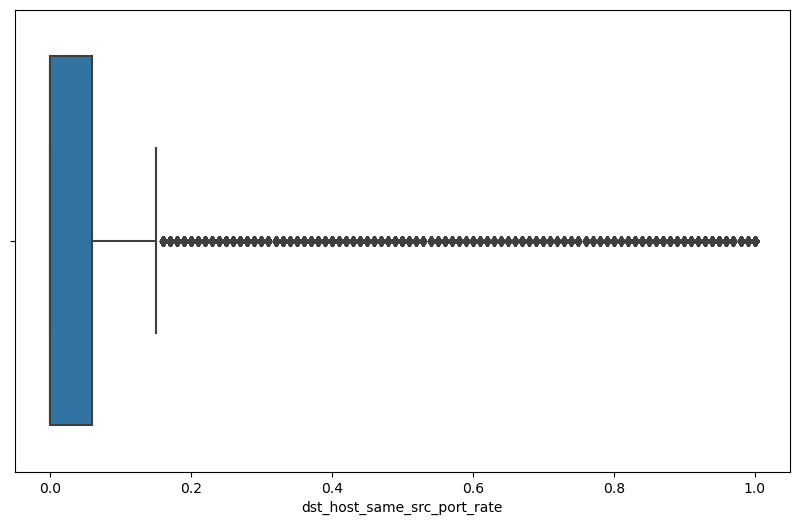

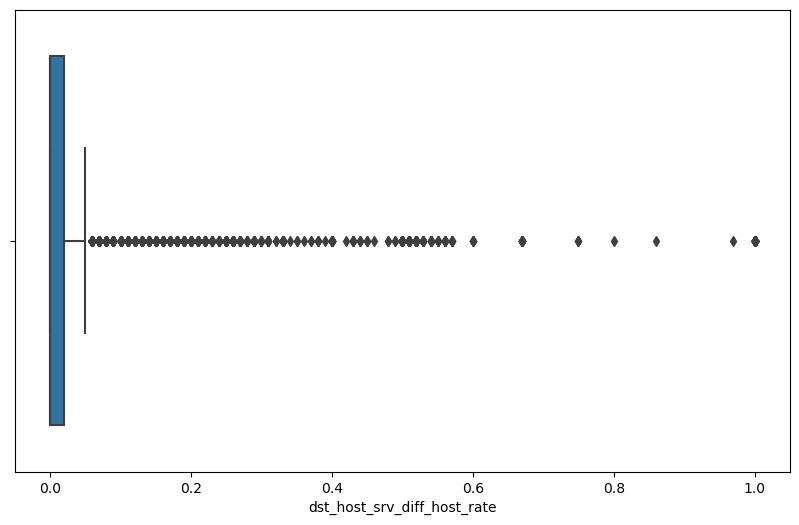

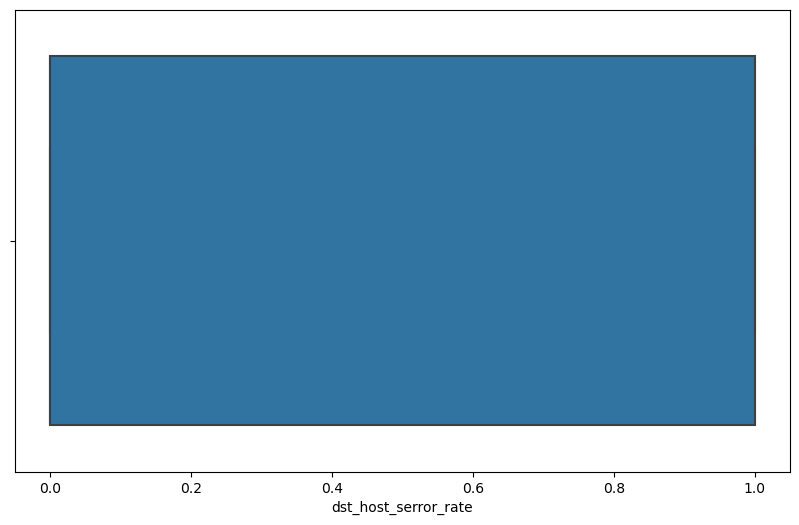

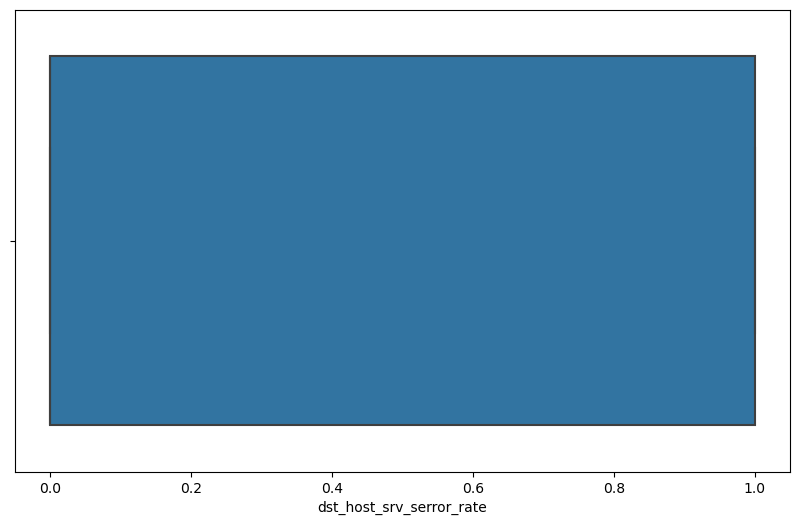

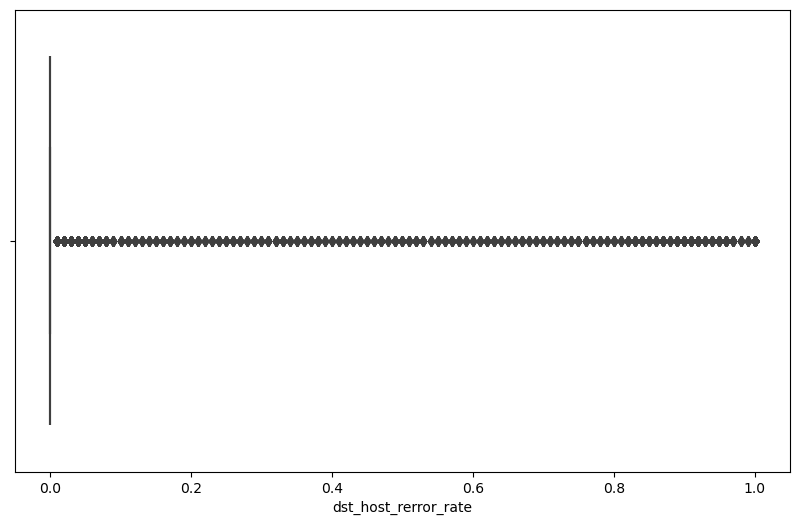

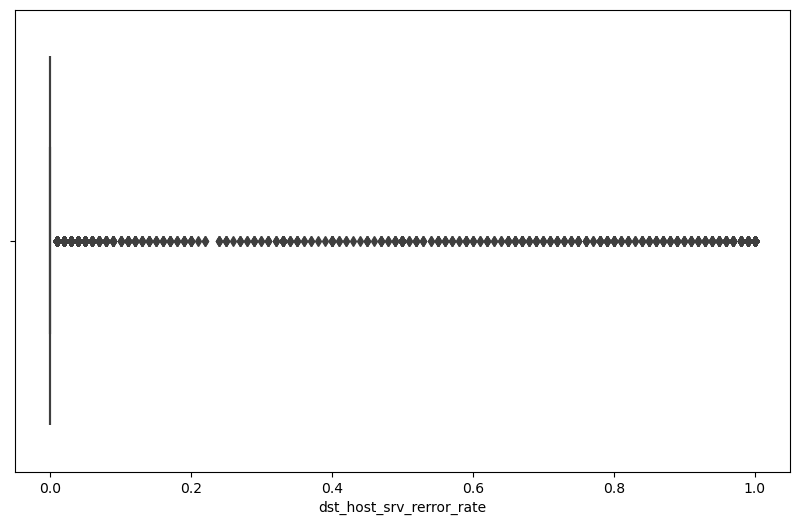

In [18]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, data=df)
    plt.show()

In [34]:
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
25188,0,334,0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
25189,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
25190,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Columns: 119 entries, duration to flag_SH
dtypes: bool(80), float64(15), int64(23), object(1)
memory usage: 9.4+ MB
None


In [37]:
print(df.describe())

           duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  25192.000000  2.519200e+04  2.519200e+04  25192.000000    25192.000000   
mean     305.054104  2.433063e+04  3.491847e+03      0.000079        0.023738   
std     2686.555640  2.410805e+06  8.883072e+04      0.008910        0.260221   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  4.400000e+01  0.000000e+00      0.000000        0.000000   
75%        0.000000  2.790000e+02  5.302500e+02      0.000000        0.000000   
max    42862.000000  3.817091e+08  5.151385e+06      1.000000        3.000000   

            urgent           hot  num_failed_logins     logged_in  \
count  25192.00000  25192.000000       25192.000000  25192.000000   
mean       0.00004      0.198039           0.001191      0.394768   
std        0.00630      2.154202           0.045418      0.4888

### Data Preprocessing

In [19]:
df = pd.get_dummies(df, columns=categorical_features)

In [20]:
X = df.drop('class', axis=1)
y = df['class']


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#Split the data into training and testing sets

In [23]:
X = df.drop('class', axis=1)

In [24]:
y = df['class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Building the Random Forest Model

In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluating the Model

In [27]:
y_pred = rf_model.predict(X_test)

### Accuracy

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.75%


### Classification Report

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      3516
      normal       1.00      1.00      1.00      4042

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



### Confusion Matrix

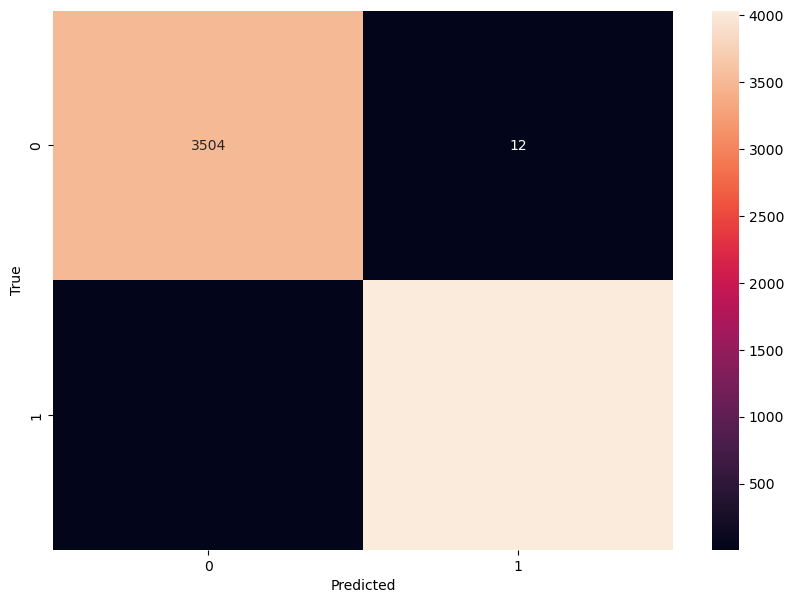

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [31]:
def detect_and_respond(data, model):
    prediction = model.predict(data)
    if prediction == 1:  # Assuming '1' indicates an incident
        # Trigger response
        print("Incident detected! Initiating response...")
        # Add response logic here (e.g., alerting, logging, mitigating actions)
    else:
        print("No incident detected.")


In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
new_data = X_test.iloc[0].values.reshape(1, -1)
detect_and_respond(new_data, rf_model)

No incident detected.


In [57]:
new_data = X_test.iloc[10].values.reshape(1, -1)
detect_and_respond(new_data, rf_model)

No incident detected.


In [45]:
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
25188,0,334,0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
25189,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
25190,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


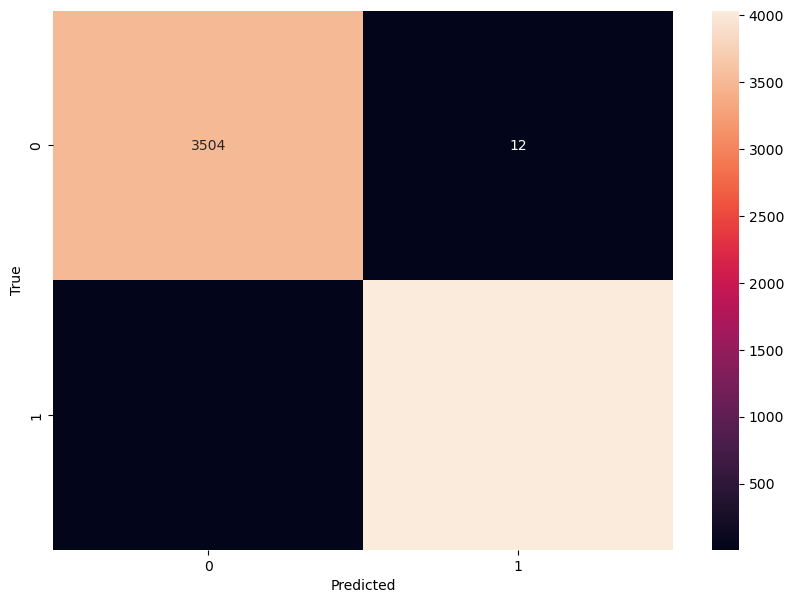

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [58]:
y_pred

array(['anomaly', 'normal', 'anomaly', ..., 'normal', 'anomaly',
       'anomaly'], dtype=object)

In [60]:
X_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
19064,0,1032,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
11127,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
6517,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2973,0,45,114,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
13339,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15322,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
24483,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
6778,0,105,147,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
9500,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


In [61]:
y_test

19064    anomaly
11127     normal
6517     anomaly
2973      normal
13339    anomaly
          ...   
15322    anomaly
24483    anomaly
6778      normal
9500     anomaly
19865    anomaly
Name: class, Length: 7558, dtype: object

In [50]:
def detect_and_respond(data, model):
    prediction = model.predict(data)
    if prediction == 1:  # Assuming '1' indicates an incident
        # Trigger response
        print("Incident detected! Initiating response...")
        # Add response logic here (e.g., alerting, logging, mitigating actions)
    else:
        print("No incident detected.")


In [52]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
new_data = X_test.iloc[].values.reshape(1, -1)
detect_and_respond(new_data, rf_model)

No incident detected.


In [74]:
pip install --upgrade flask

   ---------------------------------------- 0.0/101.7 kB ? eta -:--:--
   ------------ --------------------------- 30.7/101.7 kB 1.4 MB/s eta 0:00:01
   ------------ --------------------------- 30.7/101.7 kB 1.4 MB/s eta 0:00:01
   --------------- ----------------------- 41.0/101.7 kB 245.8 kB/s eta 0:00:01
   --------------- ----------------------- 41.0/101.7 kB 245.8 kB/s eta 0:00:01
   --------------- ----------------------- 41.0/101.7 kB 245.8 kB/s eta 0:00:01
   ----------------------- --------------- 61.4/101.7 kB 204.8 kB/s eta 0:00:01
   ------------------------------- ------- 81.9/101.7 kB 218.5 kB/s eta 0:00:01
   ----------------------------------- --- 92.2/101.7 kB 218.5 kB/s eta 0:00:01
   -------------------------------------- 101.7/101.7 kB 225.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/227.3 kB ? eta -:--:--
   ----- --------------------------------- 30.7/227.3 kB 660.6 kB/s eta 0:00:01
   ------- ------------------------------- 41.0/227.3 kB 991

In [75]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def home():
    return "Hello, Flask!"

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [76]:
%tb

SystemExit: 1